In [ ]:
#!pip install -v git+https://github.com/kevwilhelm95/pyCfS.git

In [1]:
from pyCfS import Combine, GoldStandards, Clinical, Structure, Association, Summarize
import pandas as pd
import matplotlib.pyplot as plt
import IPython
import os

# Combine

In [4]:
# Load files
eaml = pd.read_csv("/Users/kevinwilhelm/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Type 2 Diabetes/Runs/v5_BigPipeline_Mu_PyCFS/AgeSexBMI_Match_23Train/IMSB_3ML_Resources/Method_AllPVal/EAML_AF_1-0.005/EAML_output/meanMCC-results.nonzero-stats.rankings", sep = ',')
epi = pd.read_csv("/Users/kevinwilhelm/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Type 2 Diabetes/Runs/v5_BigPipeline_Mu_PyCFS/AgeSexBMI_Match_23Train/IMSB_3ML_Resources/Method_AllPVal/EPIMUTESTR_output/EPI_output.tsv", sep = '\t', header = None, names = ['gene', 'pvalue', 'qvalue'])
gene_embed = pd.read_csv("/Users/kevinwilhelm/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Type 2 Diabetes/Runs/v5_BigPipeline_Mu_PyCFS/AgeSexBMI_Match_23Train/IMSB_3ML_Resources/Method_AllPVal/EAWavelet_output/wavelet_output.csv", sep = ',')
savepath = "/Users/kevinwilhelm/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Genomics CFS Scripts/pyCFS Package/pyCFS_project/Examples/"
print(f"EAML: {eaml.columns}")
print(f"EPI: {epi.columns}")
print(f"Gene Embed: {gene_embed.columns}")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kevinwilhelm/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Type 2 Diabetes/Runs/v5_BigPipeline_Mu_PyCFS/AgeSexBMI_Match_23Train/IMSB_3ML_Resources/Method_AllPVal/EAML_AF_1-0.005/EAML_output/meanMCC-results.nonzero-stats.rankings'

       gene  occurrences                lists
0   SLC30A8            3  eaml,epi,gene_embed
9      RRP1            3  eaml,epi,gene_embed
94    TGFB1            3  eaml,epi,gene_embed
48     TP53            3  eaml,epi,gene_embed
47   HIVEP1            3  eaml,epi,gene_embed


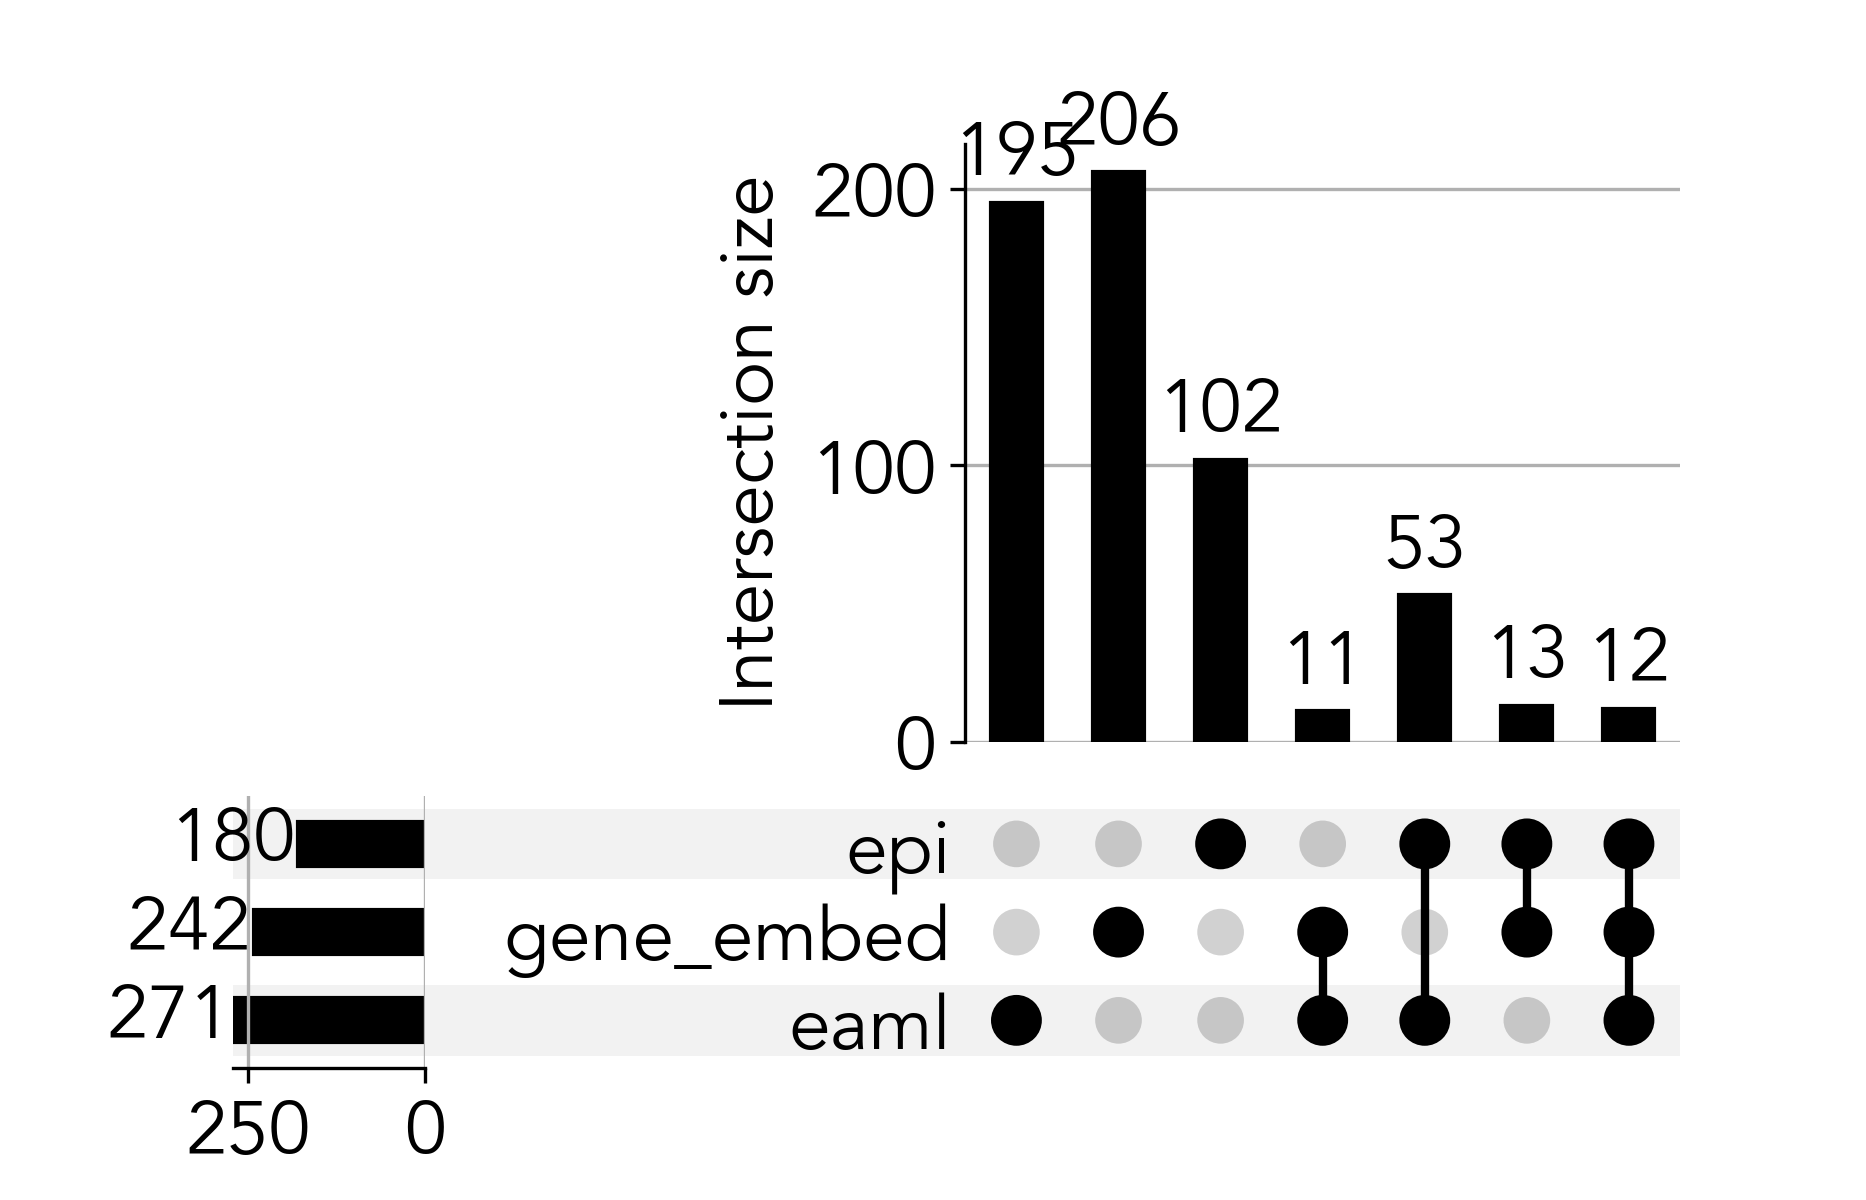

In [5]:
# Consensus
eaml_filt = eaml.gene[eaml.qvalue <= 0.1].dropna().tolist()
epi_filt = epi.gene[epi.qvalue <= 0.1].dropna().tolist()
gene_embed_filt = gene_embed.gene[gene_embed.fdr <= 0.1].dropna().tolist()

combination_df, upset_plot = Combine.consensus(
    genes_1 = eaml_filt,
    genes_2 = epi_filt,
    genes_3 = gene_embed_filt,
    list_names = ['eaml', 'epi', 'gene_embed'],
    plot_fontsize = 18
)
print(combination_df.head(5))
upset_plot

In [3]:
# Functional Clustering
eaml_filt = eaml.gene[eaml.qvalue <= 0.1].dropna().tolist()
epi_filt = epi.gene[epi.qvalue <= 0.1].dropna().tolist()
gene_embed_filt = gene_embed.gene[gene_embed.fdr <= 0.1].dropna().tolist()

if __name__ == "__main__":    
    true_gene_network, true_cluster_df, true_clusters_enrichment_df_dict = Combine.functional_clustering(
        genes_1 = eaml_filt,
        genes_2 = gene_embed_filt,
        genes_3 = epi_filt,
        source_names = ['eaml', 'gene_embed', 'epi'],
        evidences = ['all'],
        edge_confidence = 'highest',
        string_version = 'v11.5', 
        random_iter = 4, # Very low for testing purposes
        #inflation = 3.2,
        cores = 3
    )

print("True Gene Network")
print(true_gene_network.head(5))
print("\n True Cluster df")
print(true_cluster_df.head(5))
print("\n true clusters enrichment df dict")
print(true_clusters_enrichment_df_dict.keys())
print(true_clusters_enrichment_df_dict['cluster_1']['reactomes'].head(5))

Using algorithmically determined inflation parameter: 1.5
True Gene Network
          node1   node2  neighborhood  fusion  cooccurence  coexpression  \
11577415  ABCB1   EP300           1.0     1.0          1.0      1.000000   
11577276  ABCB1    TP53           1.0     1.0          1.0      1.000000   
3760329   ABCC8  KCNJ11           1.0     1.0          1.0      0.871741   
5518893   ACACB    DLAT           1.0     1.0          1.0      0.976017   
5519288   ACACB    ACLY           1.0     1.0          1.0      0.369135   

          experimental  database  textmining     score inputGenePair  \
11577415      0.963504  0.104275    0.856100  0.917514           yes   
11577276      1.000000  0.104275    0.399374  0.960063           yes   
3760329       0.058394  0.291971    0.007299  0.999896           yes   
5518893       0.982273  0.104275    0.761210  0.927022           yes   
5519288       1.000000  0.208551    0.285714  0.978907           yes   

                         pair  
11

In [6]:
# Statistical combo
eaml_p = eaml[['gene', 'pvalue']]
epi_p = epi[['gene', 'pvalue']]
gene_embed_p = gene_embed[['gene', 'p']]

consensus = Combine.statistical_combination(df_1 = eaml_p, df_2 = epi_p, df_3 = gene_embed_p, list_names = ['eaml', 'epi', 'gene_embed'])
consensus.head(3)

gene        p_eaml         p_epi  p_gene_embed  p.cauchy         p.min  \
0  SLC30A8  4.499715e-19  1.372028e-30      0.000138  0.000000  1.372028e-30   
1    FHOD1  6.110000e-07  8.137012e-04      0.074240  0.000002  6.110000e-07   
2    ITM2C  1.196934e-06  2.348293e-02      0.987759  0.000004  1.196934e-06   

      p.mcm         p.cmc    p.multiply  
0  0.000000  0.000000e+00  8.504458e-53  
1  0.000001  9.163261e-07  3.690991e-11  
2  0.000002  1.795422e-06  2.776345e-08

# GoldStandard

In [5]:
# Load genelists
cauchy = pd.read_csv('/Users/Kevin/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Type 2 Diabetes/Runs/v5_BigPipeline_Mu_PyCFS/AgeSexBMI_Match_23Train/IMSB_3ML_Resources/GeneLists/StatisticalCombo/StatComboLists_NoFill/Cauchy/v5_T2D_3Method_Cauchey_p<1.e-04.txt', header = None, names = ['Gene'])
gs = pd.read_csv('/Users/Kevin/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Type 2 Diabetes/GoldStandards/Individual Lists/OpenTargetPlatform_07.24.23/OpenTargets_Score>0.6_Genetics>0.6_GenomeExome/OpenTarget_Set2_2_7.27.23.txt', header = None, names = ['Gene'])
savepath = "/Users/Kevin/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Genomics CFS Scripts/pyCFS Package/pyCFS_project/Examples/"
cauchy = cauchy['Gene'].tolist()
gs = gs['Gene'].tolist()
print("Cauchy: ", len(cauchy))
print("GS: ", len(gs))

Cauchy:  178
GS:  11


STRING API version: 12.0
Network df
             stringId_A            stringId_B preferredName_A preferredName_B  \
0  9606.ENSP00000037502  9606.ENSP00000346839            MYOC             FN1   
1  9606.ENSP00000037502  9606.ENSP00000414856            MYOC         SPARCL1   

   ncbiTaxonId  score  nscore  fscore  pscore  ascore  escore  dscore  tscore  
0         9606  0.777     0.0     0.0     0.0   0.000   0.292     0.0   0.698  
1         9606  0.856     0.0     0.0     0.0   0.071   0.236     0.0   0.814  

P-value:  1.23e-05
Enrichment groups tested:  dict_keys(['TISSUES', 'KEGG', 'PMID', 'COMPARTMENTS', 'Process', 'WikiPathways', 'Component', 'HPO', 'Keyword', 'RCTM', 'Function', 'DISEASES', 'SMART', 'NetworkNeighborAL', 'InterPro'])


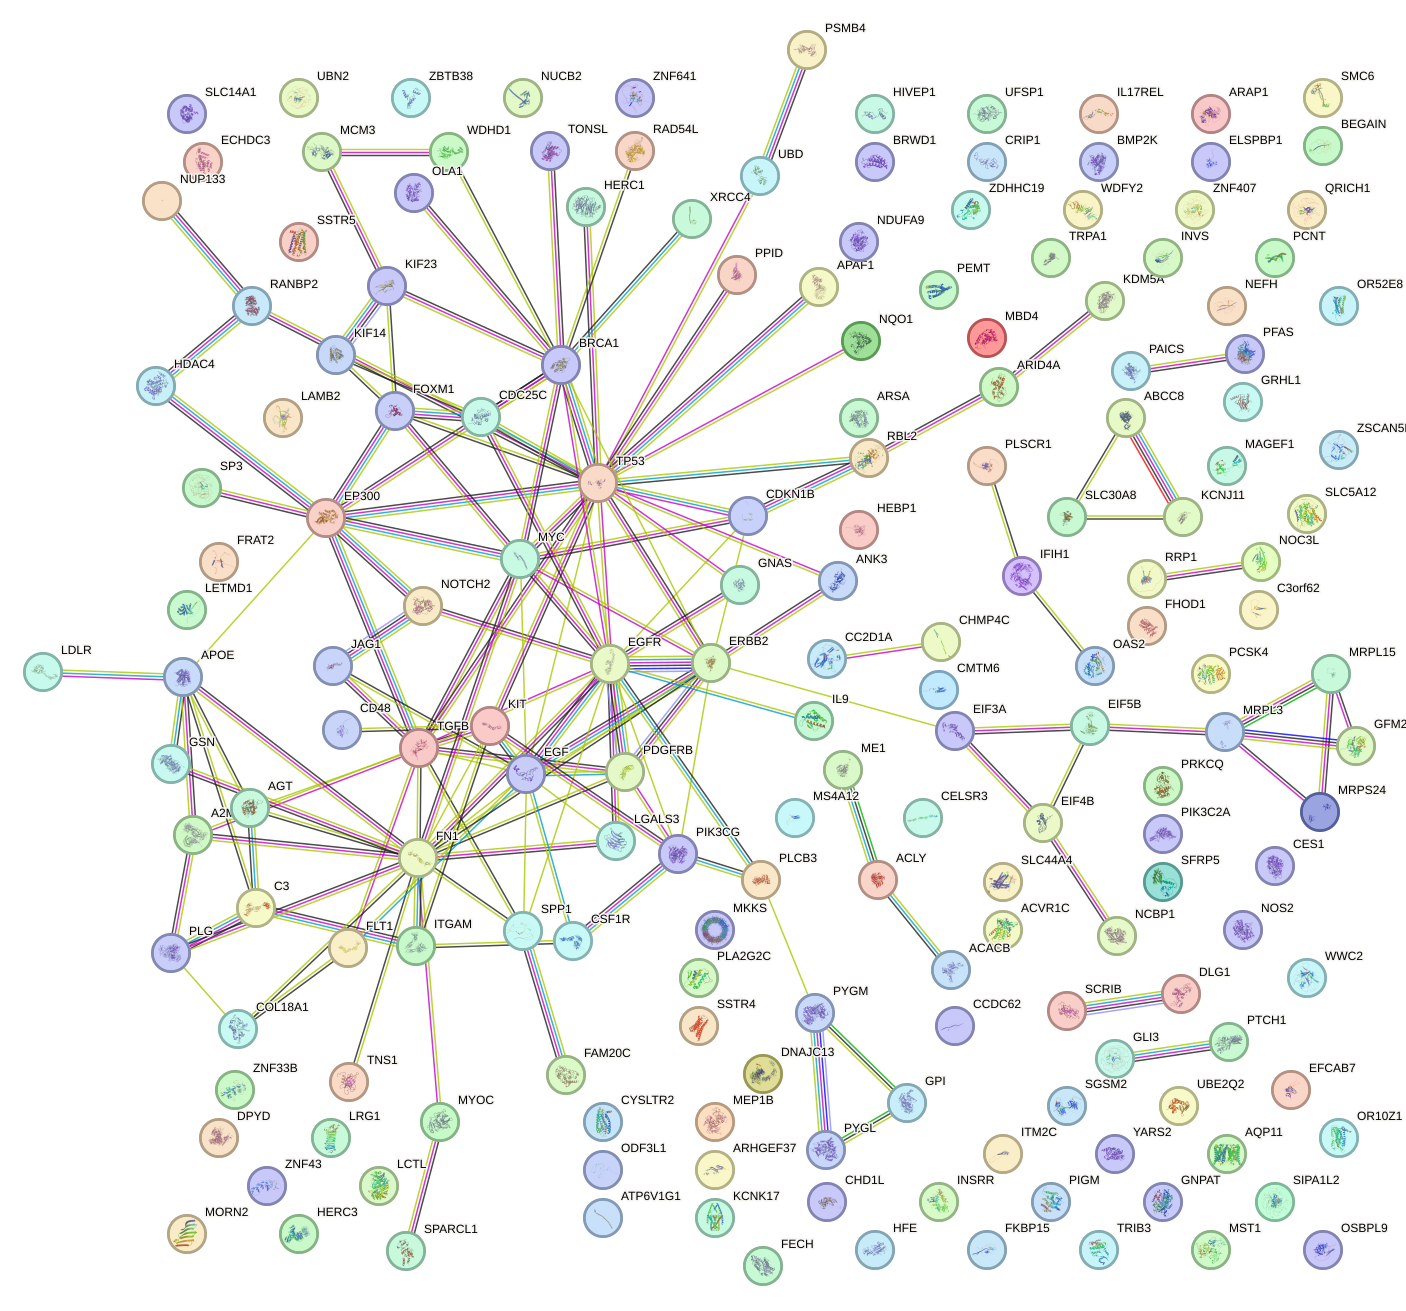

In [9]:
# STRING PPI
network_df, p_value, network_image, functional_enrichment_df, enrichment_plots = GoldStandards.string_enrichment(
    query = cauchy,
    string_version = 'v12.0',
    edge_confidence = 'high',
    species = 9606
)
print("Network df")
print(network_df.head(2))
print("")
print("P-value: ", p_value)
print("Enrichment groups tested: ", enrichment_plots.keys())
network_image

['SLC30A8', 'KCNJ11', 'ABCC8']


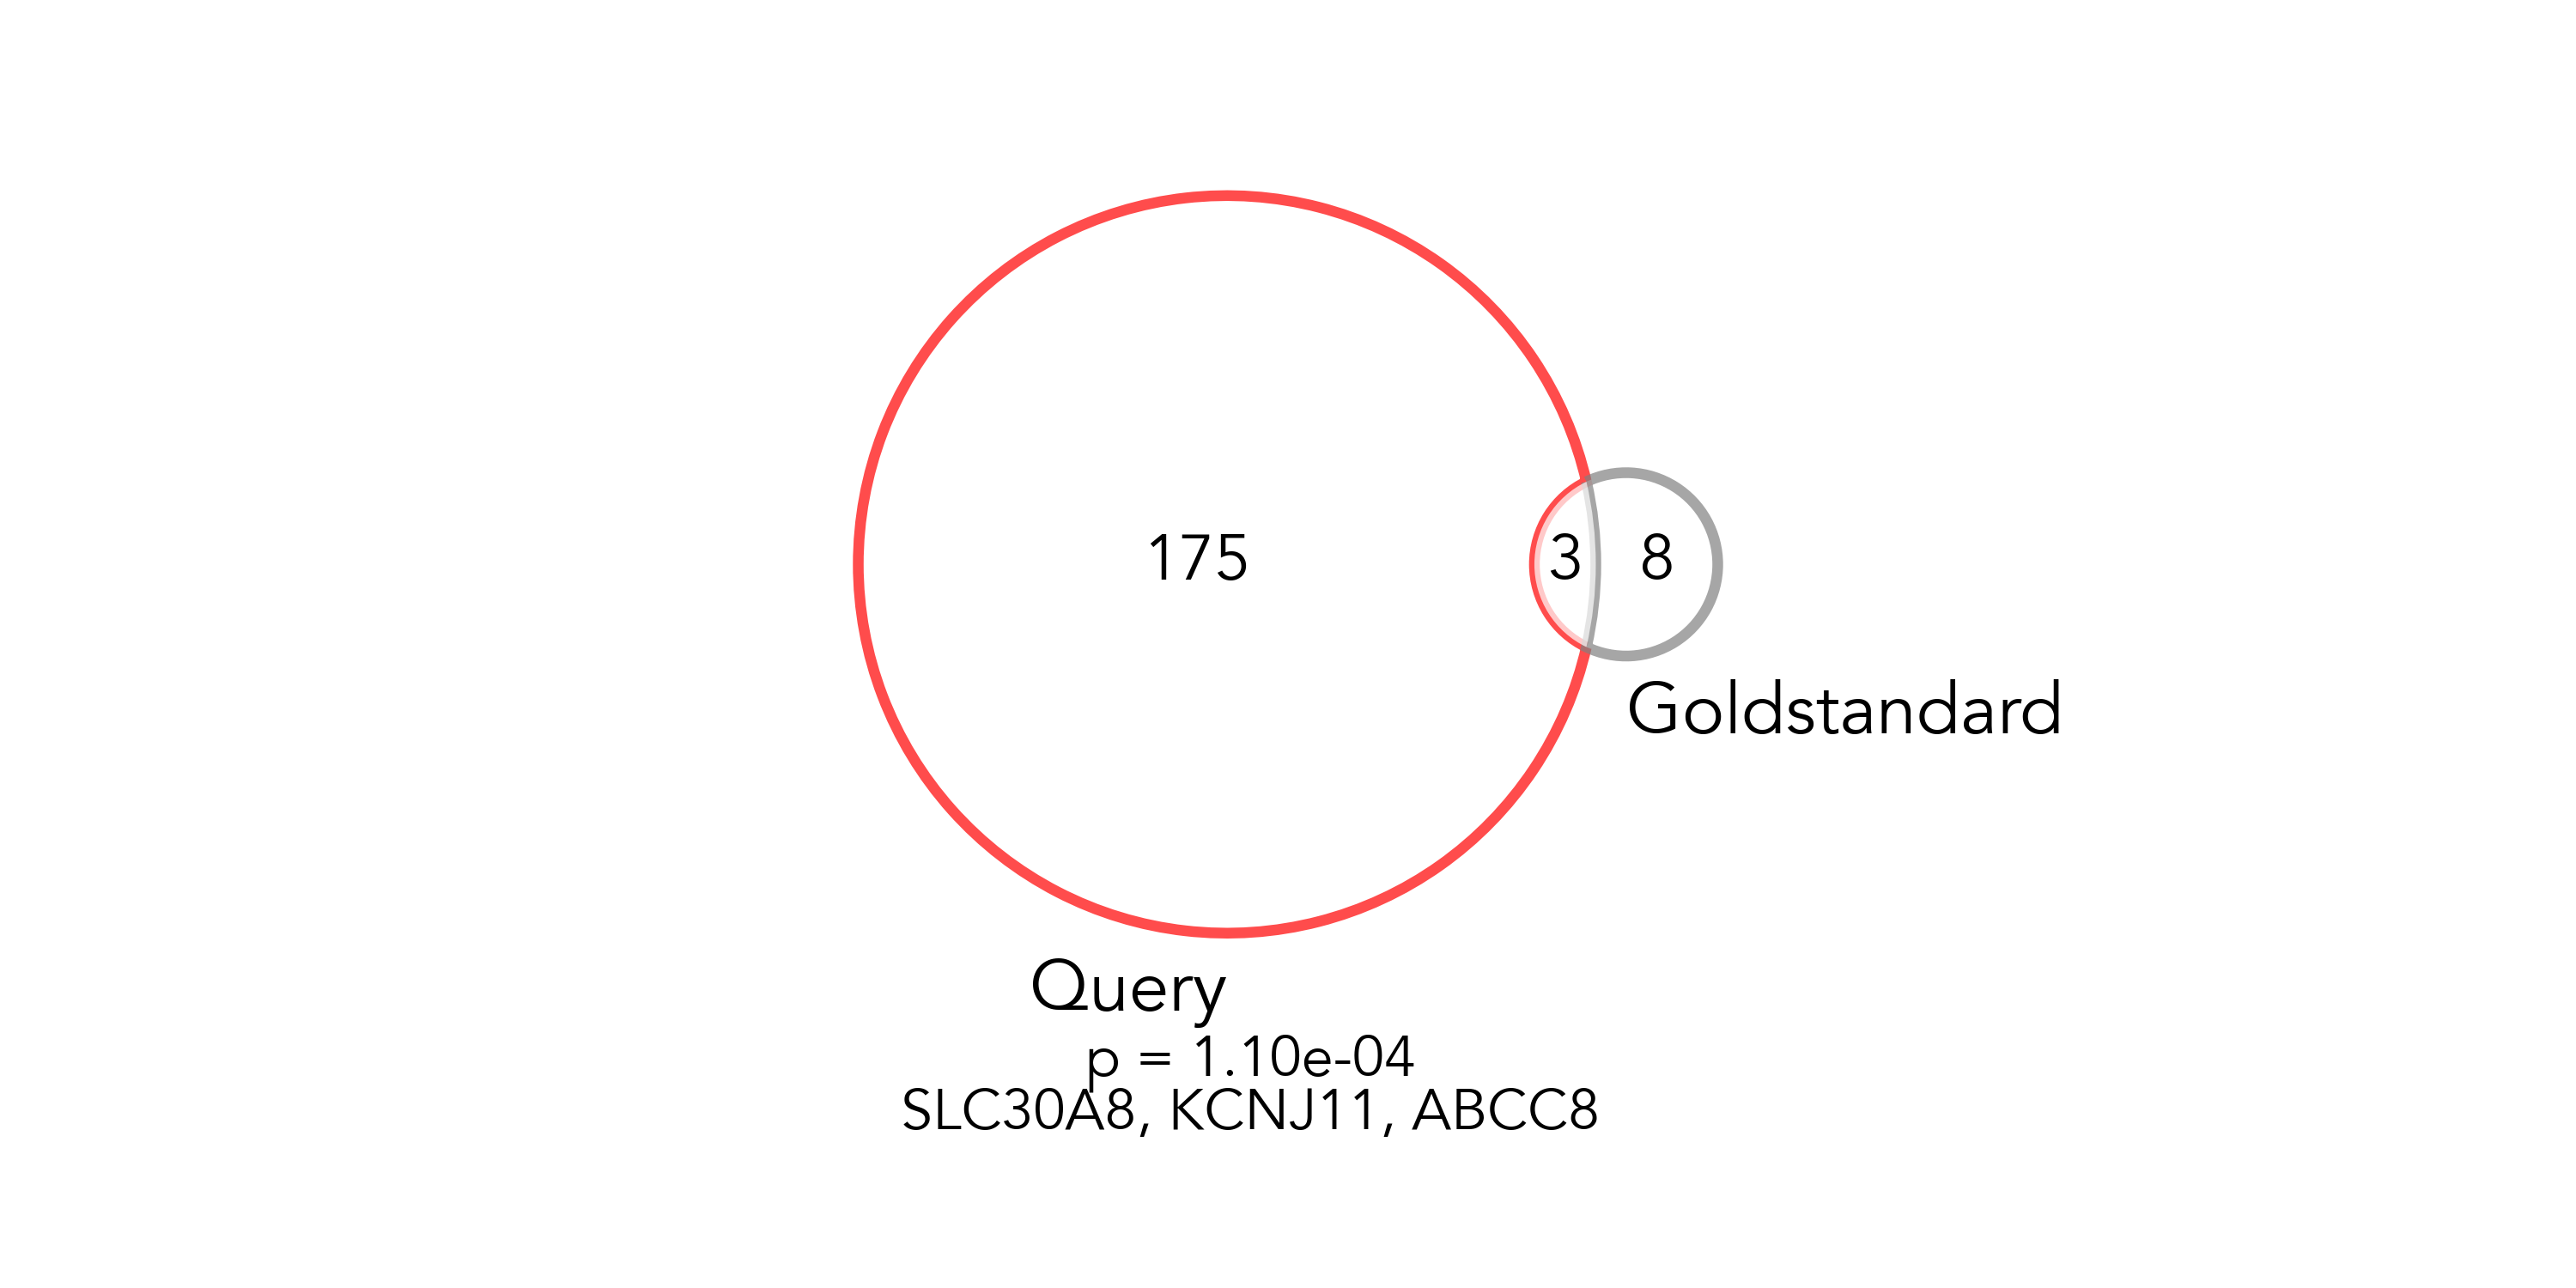

In [18]:
# GS overlap
overlapping_genes, pval, venn_diagram = GoldStandards.goldstandard_overlap(query = cauchy, goldstandard = gs, plot_fontsize = 18, savepath = savepath)
print(overlapping_genes)
venn_diagram

144 genes are mapped (out of 178) in Set_1
 10 genes are mapped (out of 11) in Set_2
 2 are overlapped and mapped (out of 3)

show_1_ z-score:  2.68
show_2_ z-score:  0.93


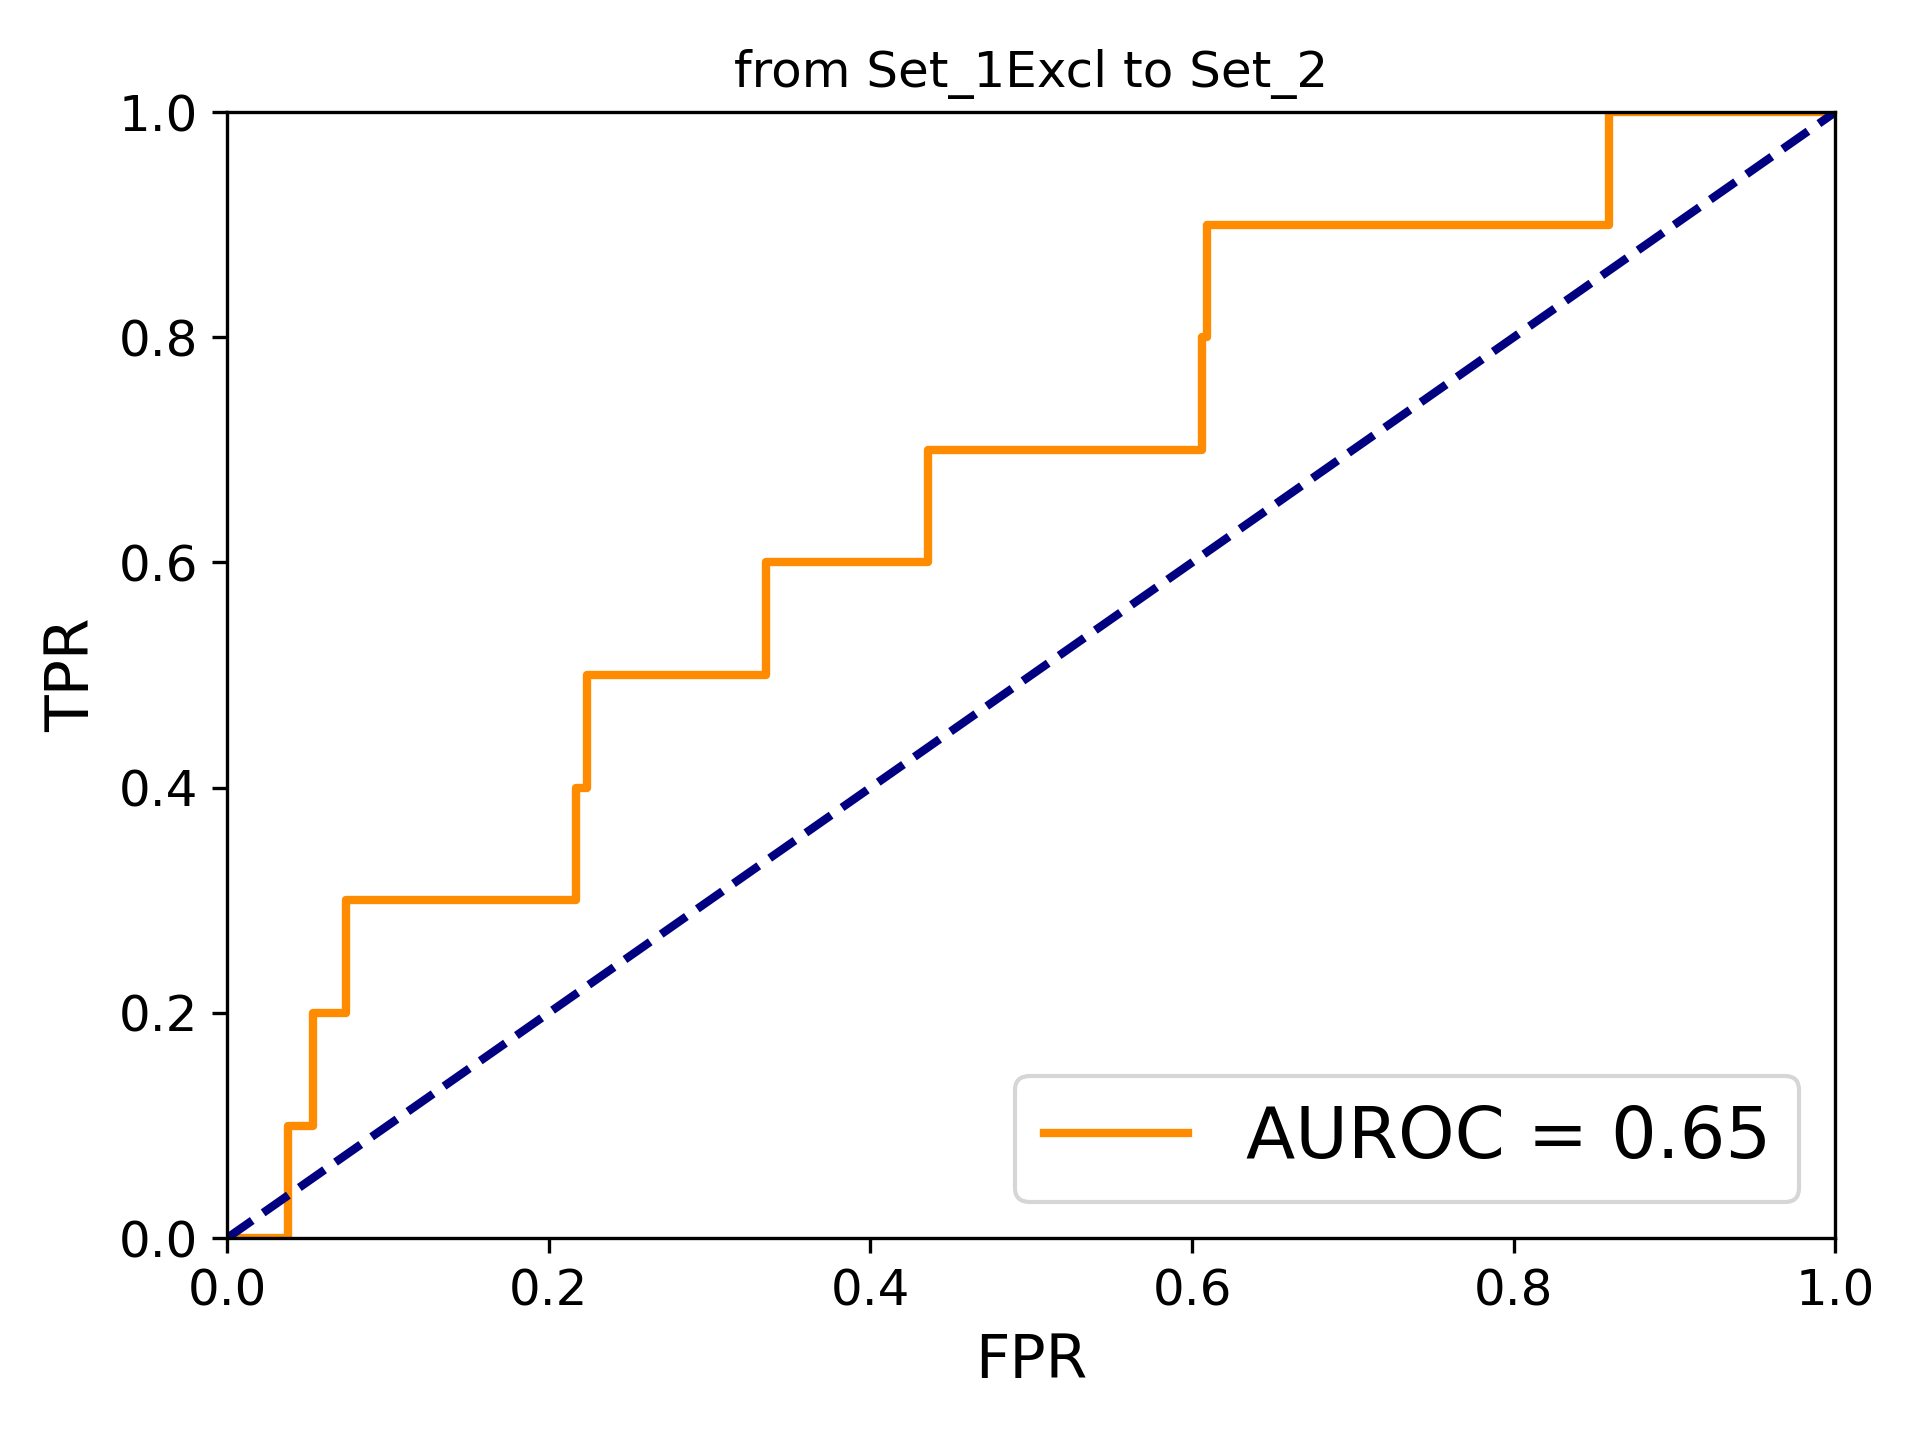

In [8]:
#ndiffusion
if __name__ == "__main__":
    show_1_auroc, show_1_z, show_2_auroc, show_2_z = GoldStandards.ndiffusion(
        set_1 = cauchy,
        set_2 = gs,
        edge_confidence = 'highest',
        n_iter = 10,
        cores = 6
    )
    print('show_1_ z-score: ', show_1_z)
    print('show_2_ z-score: ', show_2_z)
show_1_auroc

        node1   node2     score node1_source node2_source
9404092  AKT2    TP53  0.973159       [set2]       [set1]
9404378  AKT2    NOS2  0.942265       [set2]       [set1]
9404799  AKT2  PIK3CG  0.974500       [set2]       [set1]
9404838  AKT2   BRCA1  0.938164       [set2]       [set1]
9403181  AKT2  CDKN1B  0.956271       [set2]       [set1]


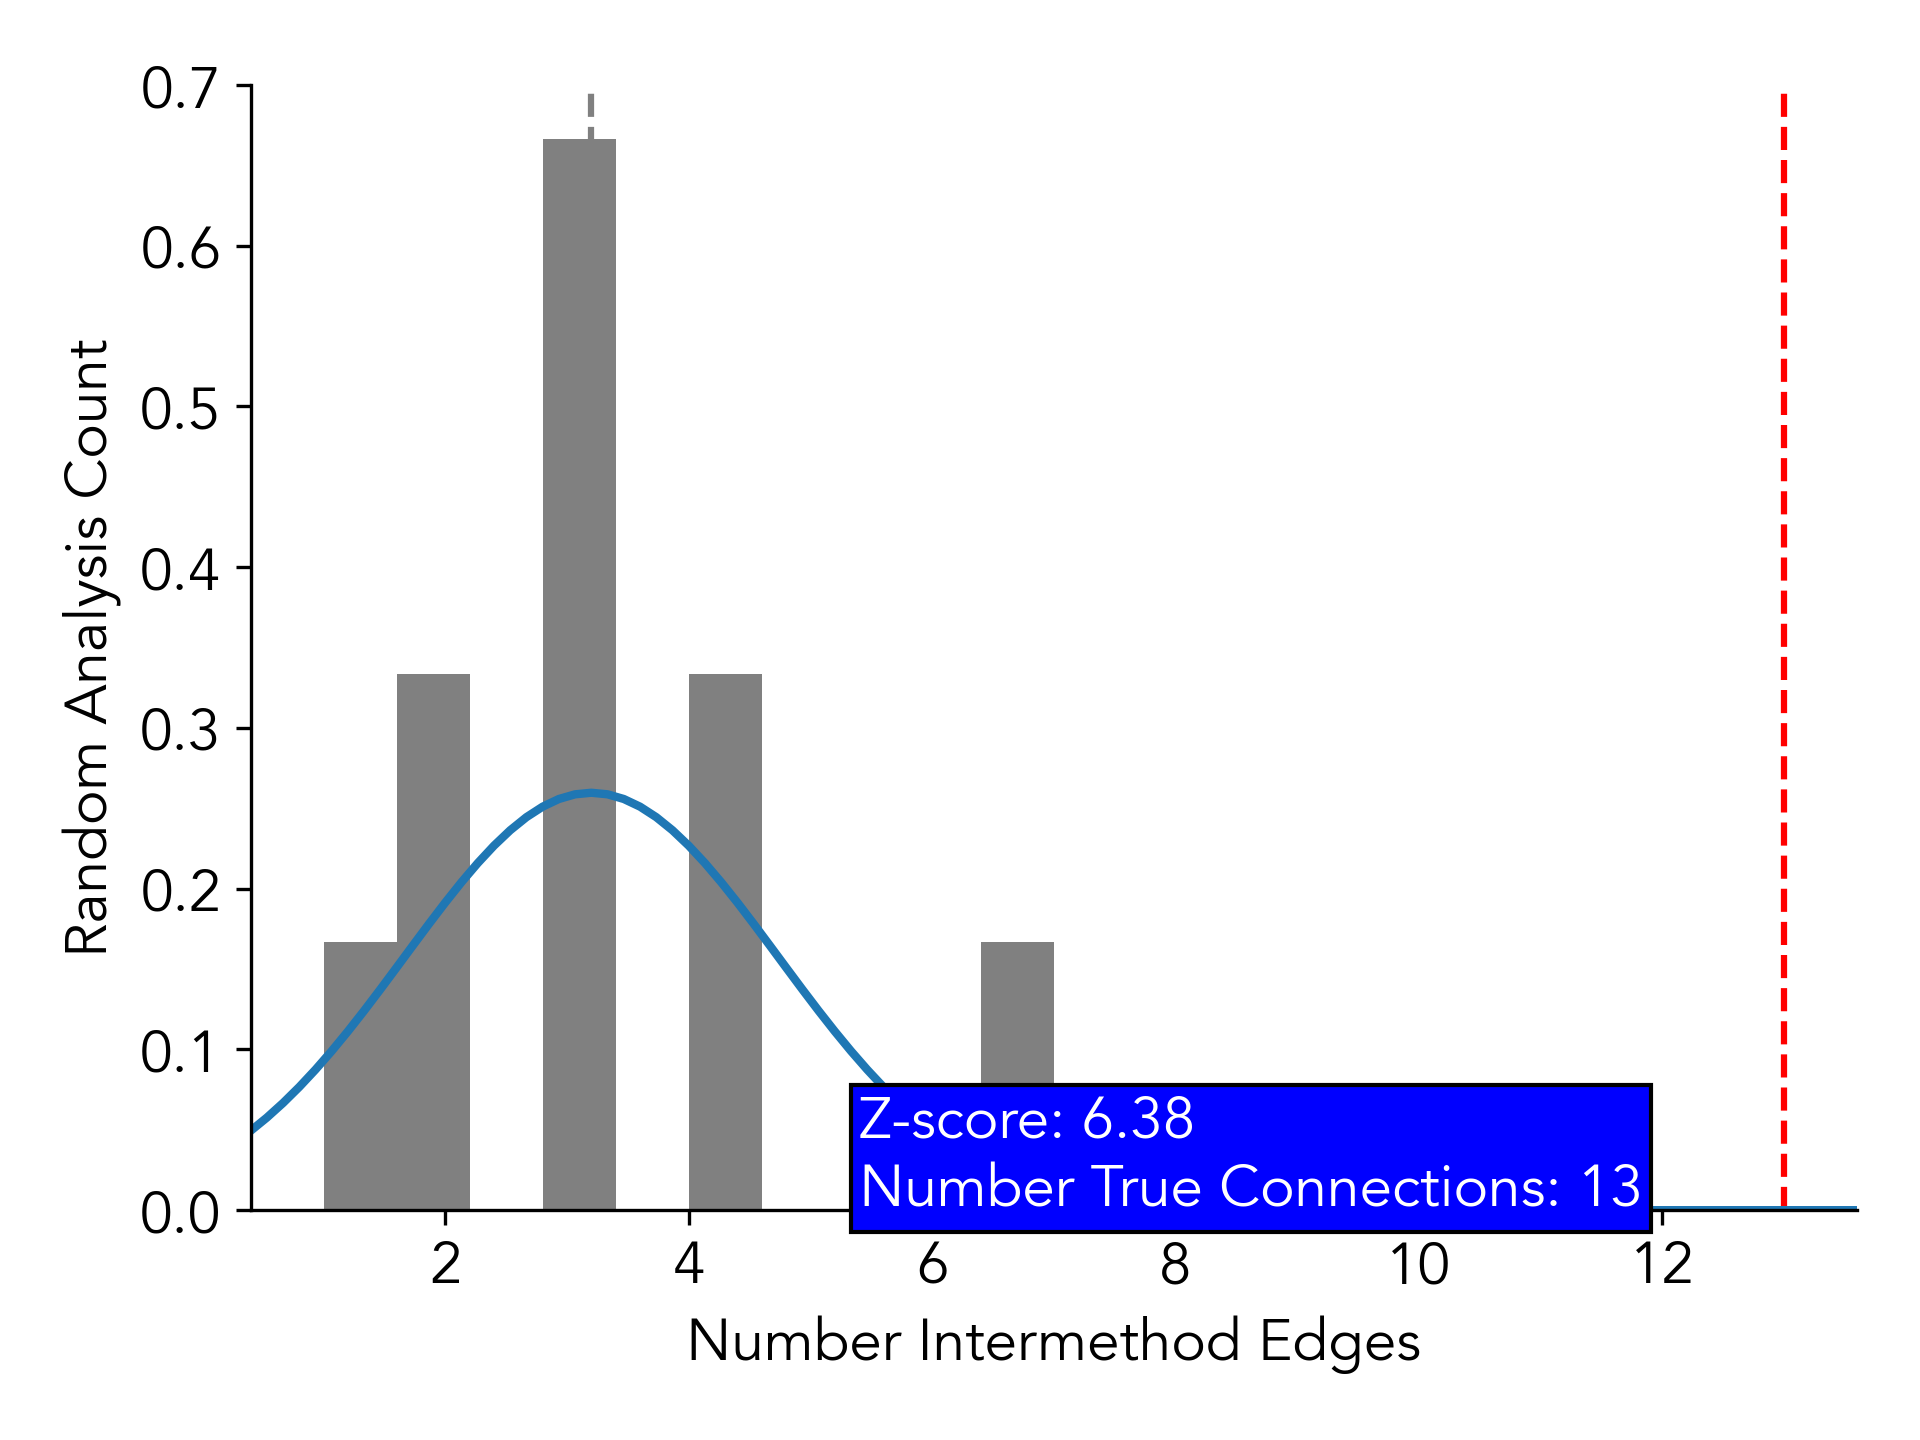

In [19]:
# Interconnectivity
if __name__ == '__main__':
    venn_, histo_, random_connections, connection_df, gene_sources = GoldStandards.interconnectivity(
        set_1 = cauchy,
        set_2 = gs,
        string_version = 'v12.0',
        edge_confidence = 'highest',
        evidences = ['all'],
        num_iterations = 10,
        cores = 6,
        savepath = savepath
    )

print(connection_df.head(5))
histo_

In [6]:
# PubMed Co-Mentions
comention_df, z_scores, image_dict = GoldStandards.pubmed_comentions(
    query = cauchy,
    keyword = "diabetes",
    enrichment_trials = 5,
    savepath = savepath
)
print(comention_df.head(5))
print(z_scores)
print(image_dict[(15,50)])
# z_scores & image_dict are empty if run_enrichment == False

       PubMed_CoMentions-diabetes  \
EGFR                         2090   
KIT                          1141   
APOE                         1085   
NOS2                          629   
KCNJ11                        621   

                                 PMID for Gene + diabetes  
EGFR    34873433; 29339356; 37093083; 38833073; 354661...  
KIT     36911691; 31686736; 34850005; 28821222; 314253...  
APOE    37611586; 35041557; 37975117; 30853126; 355354...  
NOS2    37204119; 19395279; 19325007; 17070441; 342947...  
KCNJ11  32027066; 26448950; 32376986; 33568422; 355311...  
{(-1, 0): (40, -7.788152114044682), (0, 5): (64, -0.47140452079103173), (5, 15): (18, 1.2787240261820123), (15, 50): (21, 8.404191500829137), (50, 100000): (35, 8.547395569089613)}
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1800x1050 at 0x7FA3E2A9D490>


In [21]:
# GWAS Catalog
if __name__ == '__main__':
    coloc_df, p = GoldStandards.gwas_catalog_colocalization(
        query = cauchy,
        mondo_id = 'MONDO_0005148',
        gwas_p_thresh = 5e-15,
        distance_mbp = 0.5,
        cores = 3,
        savepath = savepath
    )
print(coloc_df.head(5))
print(p)

/Users/Kevin/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Genomics CFS Scripts/pyCFS Package/pyCFS_project/pyCfS/GoldStandards.py:2326: UserWarning: The following genes were not found in the reference gene index: C3orf62
  warnings.warn(f"The following genes were not found in the reference gene index: {', '.join(unmatched_genes)}")


                                                      SNPs
Gene                                                      
SLC30A8  [rs3802177-? (SLC30A8; 3.9 Kbp), rs4269571-? (...
SGSM2                                                   []
ODF3L1   [rs6495182-C (PTPN9; 201.9 Kbp), rs11636031-T ...
SSTR4                                                   []
MST1                                                    []
0.00021662771161521602


# Clinical

In [4]:
# Load data
cauchy = pd.read_csv('/Users/Kevin/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Type 2 Diabetes/Runs/v5_BigPipeline_Mu_PyCFS/AgeSexBMI_Match_23Train/IMSB_3ML_Resources/GeneLists/StatisticalCombo/StatComboLists/Cauchy/v5_T2D_3Method_Cauchey_p<1.e-04.txt', header = None, names = ['Gene'])
savepath = "/Users/Kevin/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Genomics CFS Scripts/pyCFS Package/pyCFS_project/Examples/"
cauchy = cauchy['Gene'].tolist()

# of target genes tested in MGI: 136/178
                                               Freq  RandomAvgFreq  \
original_index                                                       
decreased macrophage cell number                  5       1.333333   
increased susceptibility to weight gain           4       1.166667   
increased circulating VLDL triglyceride level     4       1.166667   
abnormal vascular development                     6       2.500000   
abnormal response to infection                    7       1.800000   

                                               RandomStdFreq   z-score  \
original_index                                                           
decreased macrophage cell number                    0.471405  7.778175   
increased susceptibility to weight gain             0.372678  7.602631   
increased circulating VLDL triglyceride level       0.372678  7.602631   
abnormal vascular development                       0.500000  7.000000   
abnormal response to inf

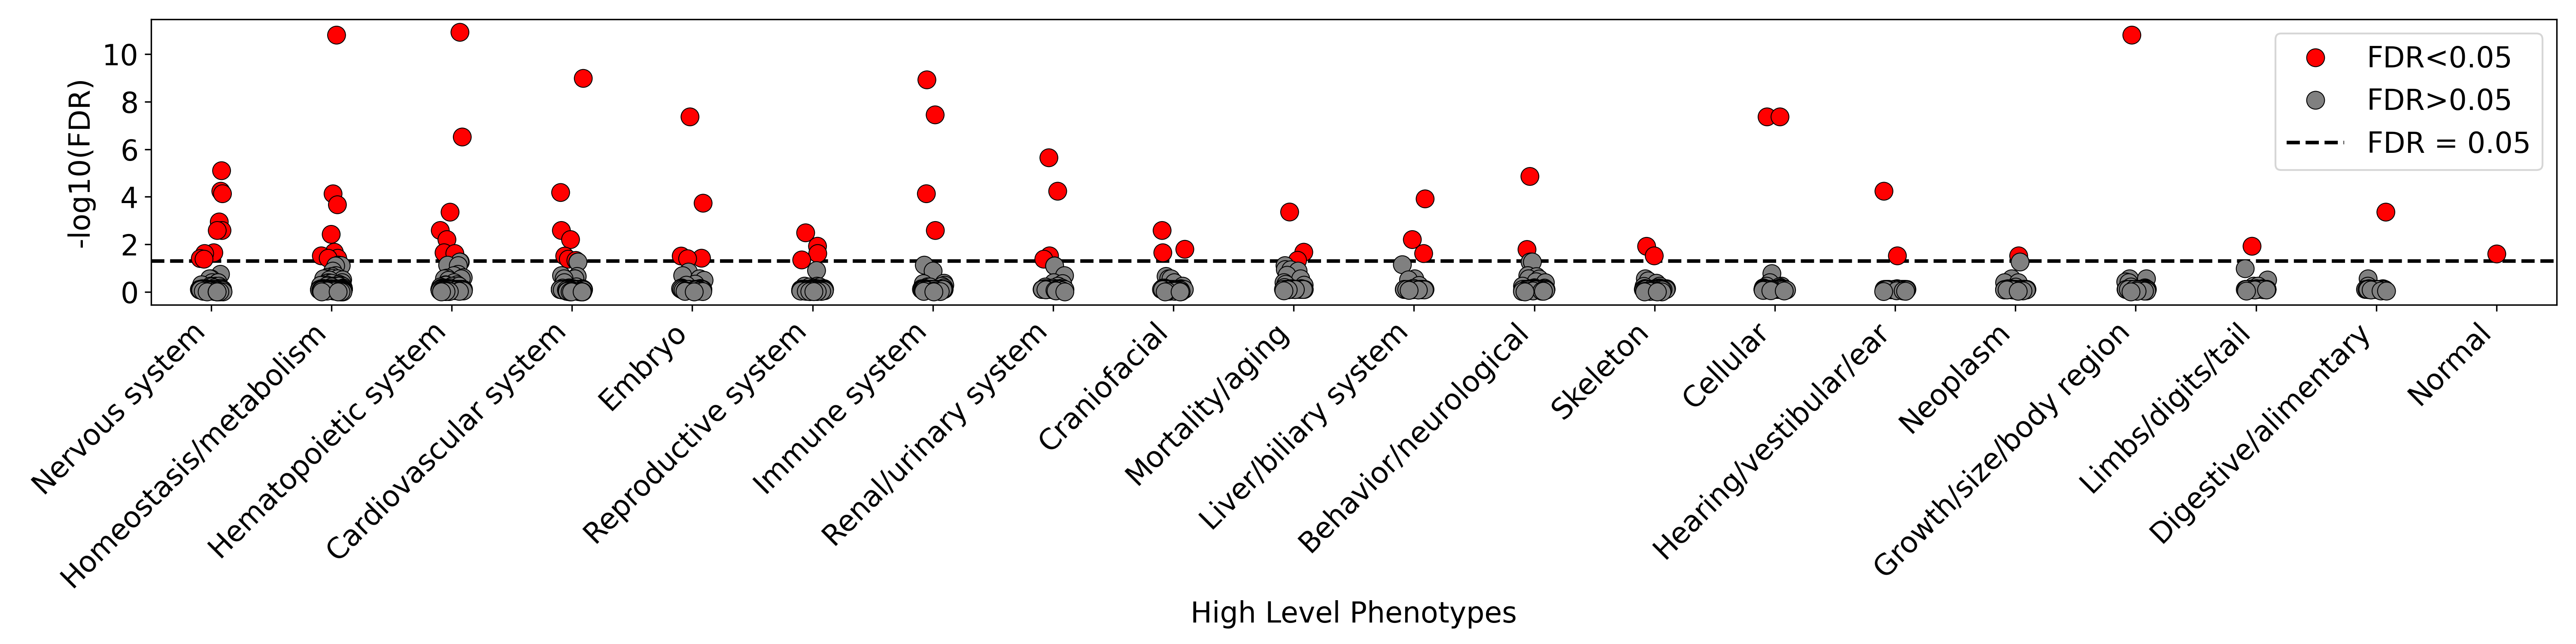

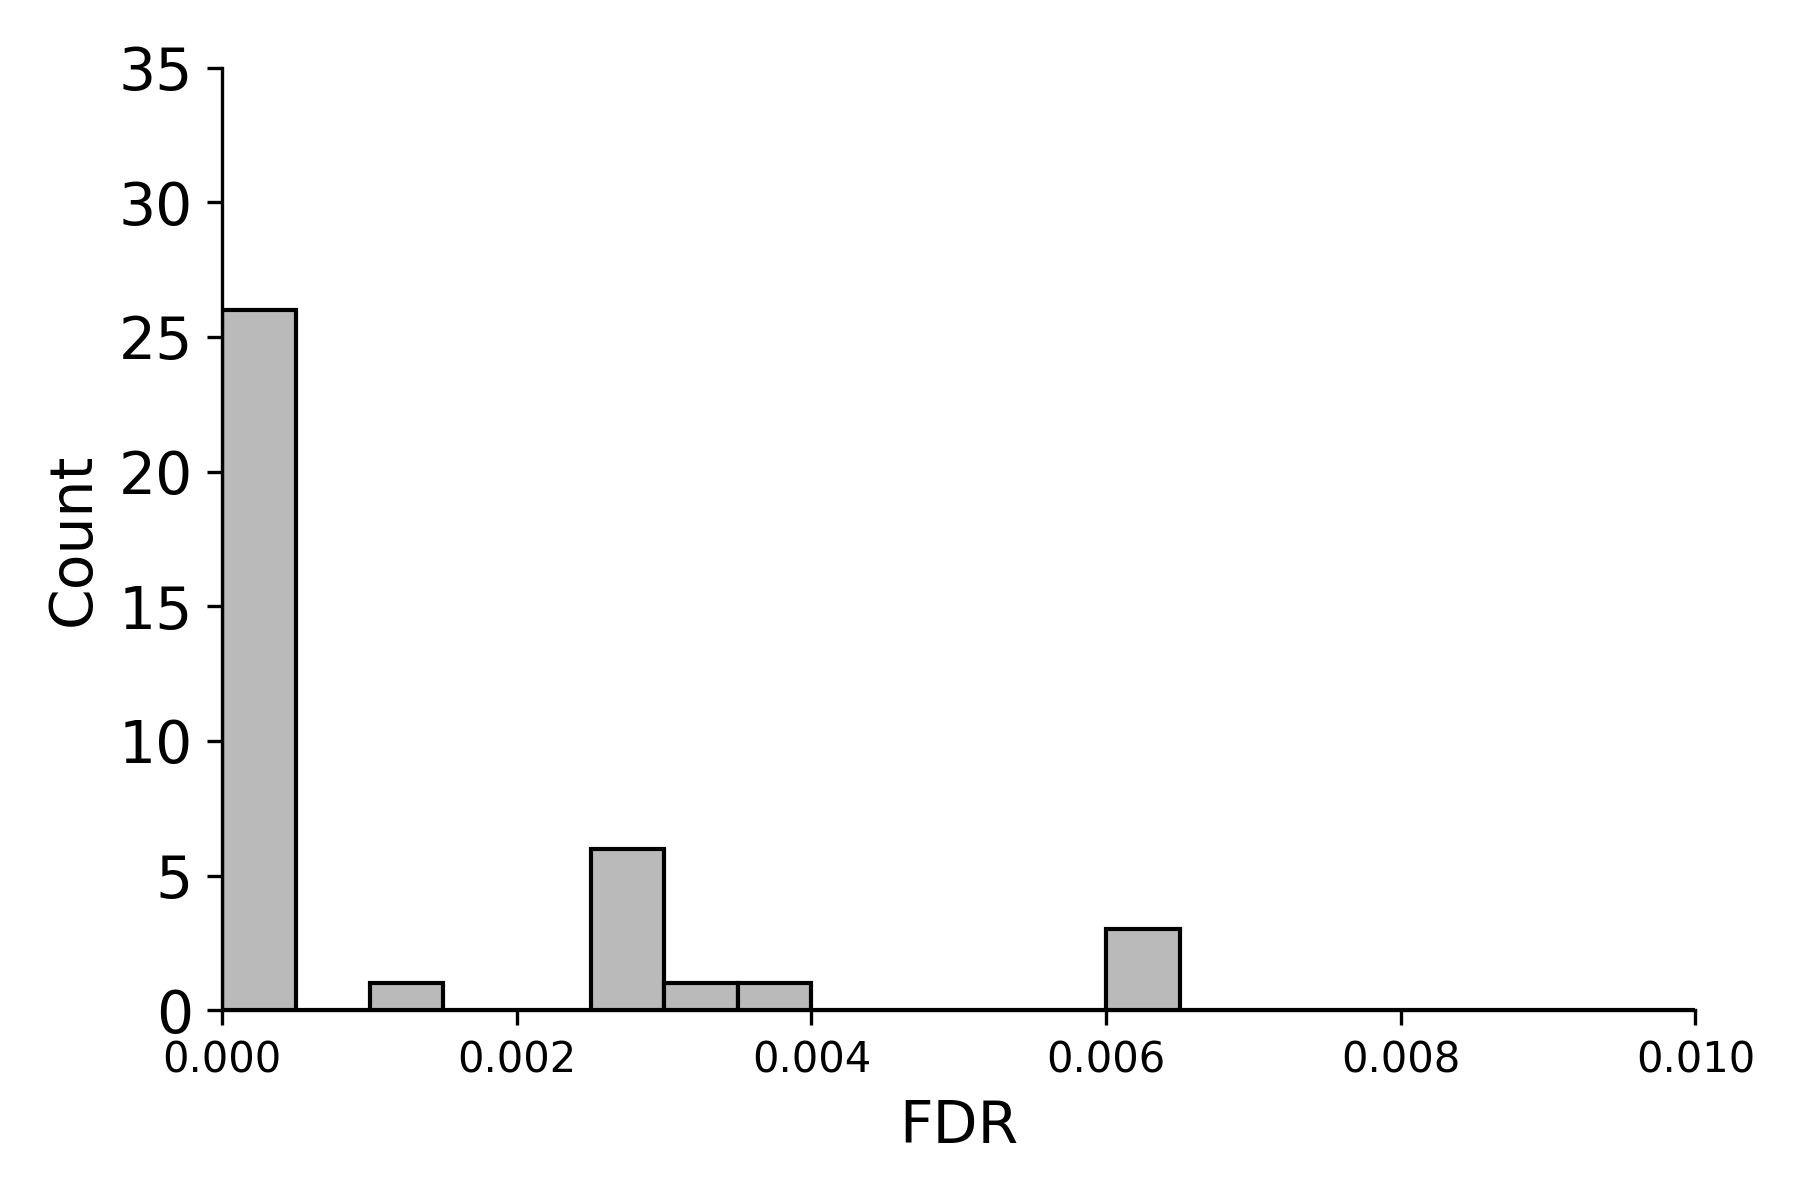

In [10]:
# Mouse phenotypes
if __name__ == "__main__":
    mouse_phenotype_df, strip_plot, fdr_plot = Clinical.mouse_phenotype_enrichment(
        query = cauchy,
        custom_background = 'ensembl',
        random_iter = 10, # Low for example 
        cores = 2
    )
    print(mouse_phenotype_df.head(5))
    IPython.display.display(strip_plot)
    IPython.display.display(fdr_plot)

176/178 target genes in Open Targets
                           Freq  RandomAvgFreq  RandomStdFreq   z-score  \
Kinase                       11       4.083333       1.840894  3.757233   
Voltage-gated ion channel     4       1.619718       0.828476  2.873086   
Eraser                        2       1.125000       0.330719  2.645751   
Hydrolase                     7       3.082474       1.537638  2.547755   
no_level_assignment         127     141.740000       5.962583 -2.472083   

                             pvalue       fdr  \
Kinase                     0.000172  0.002749   
Voltage-gated ion channel  0.004065  0.032519   
Eraser                     0.008151  0.042985   
Hydrolase                  0.010842  0.042985   
no_level_assignment        0.013433  0.042985   

                                                                geneMappings  \
Kinase                     [FLT1, CSF1R, EGFR, BMP2K, PDGFRB, KIT, INSRR,...   
Voltage-gated ion channel                     [ABCC8, KCN

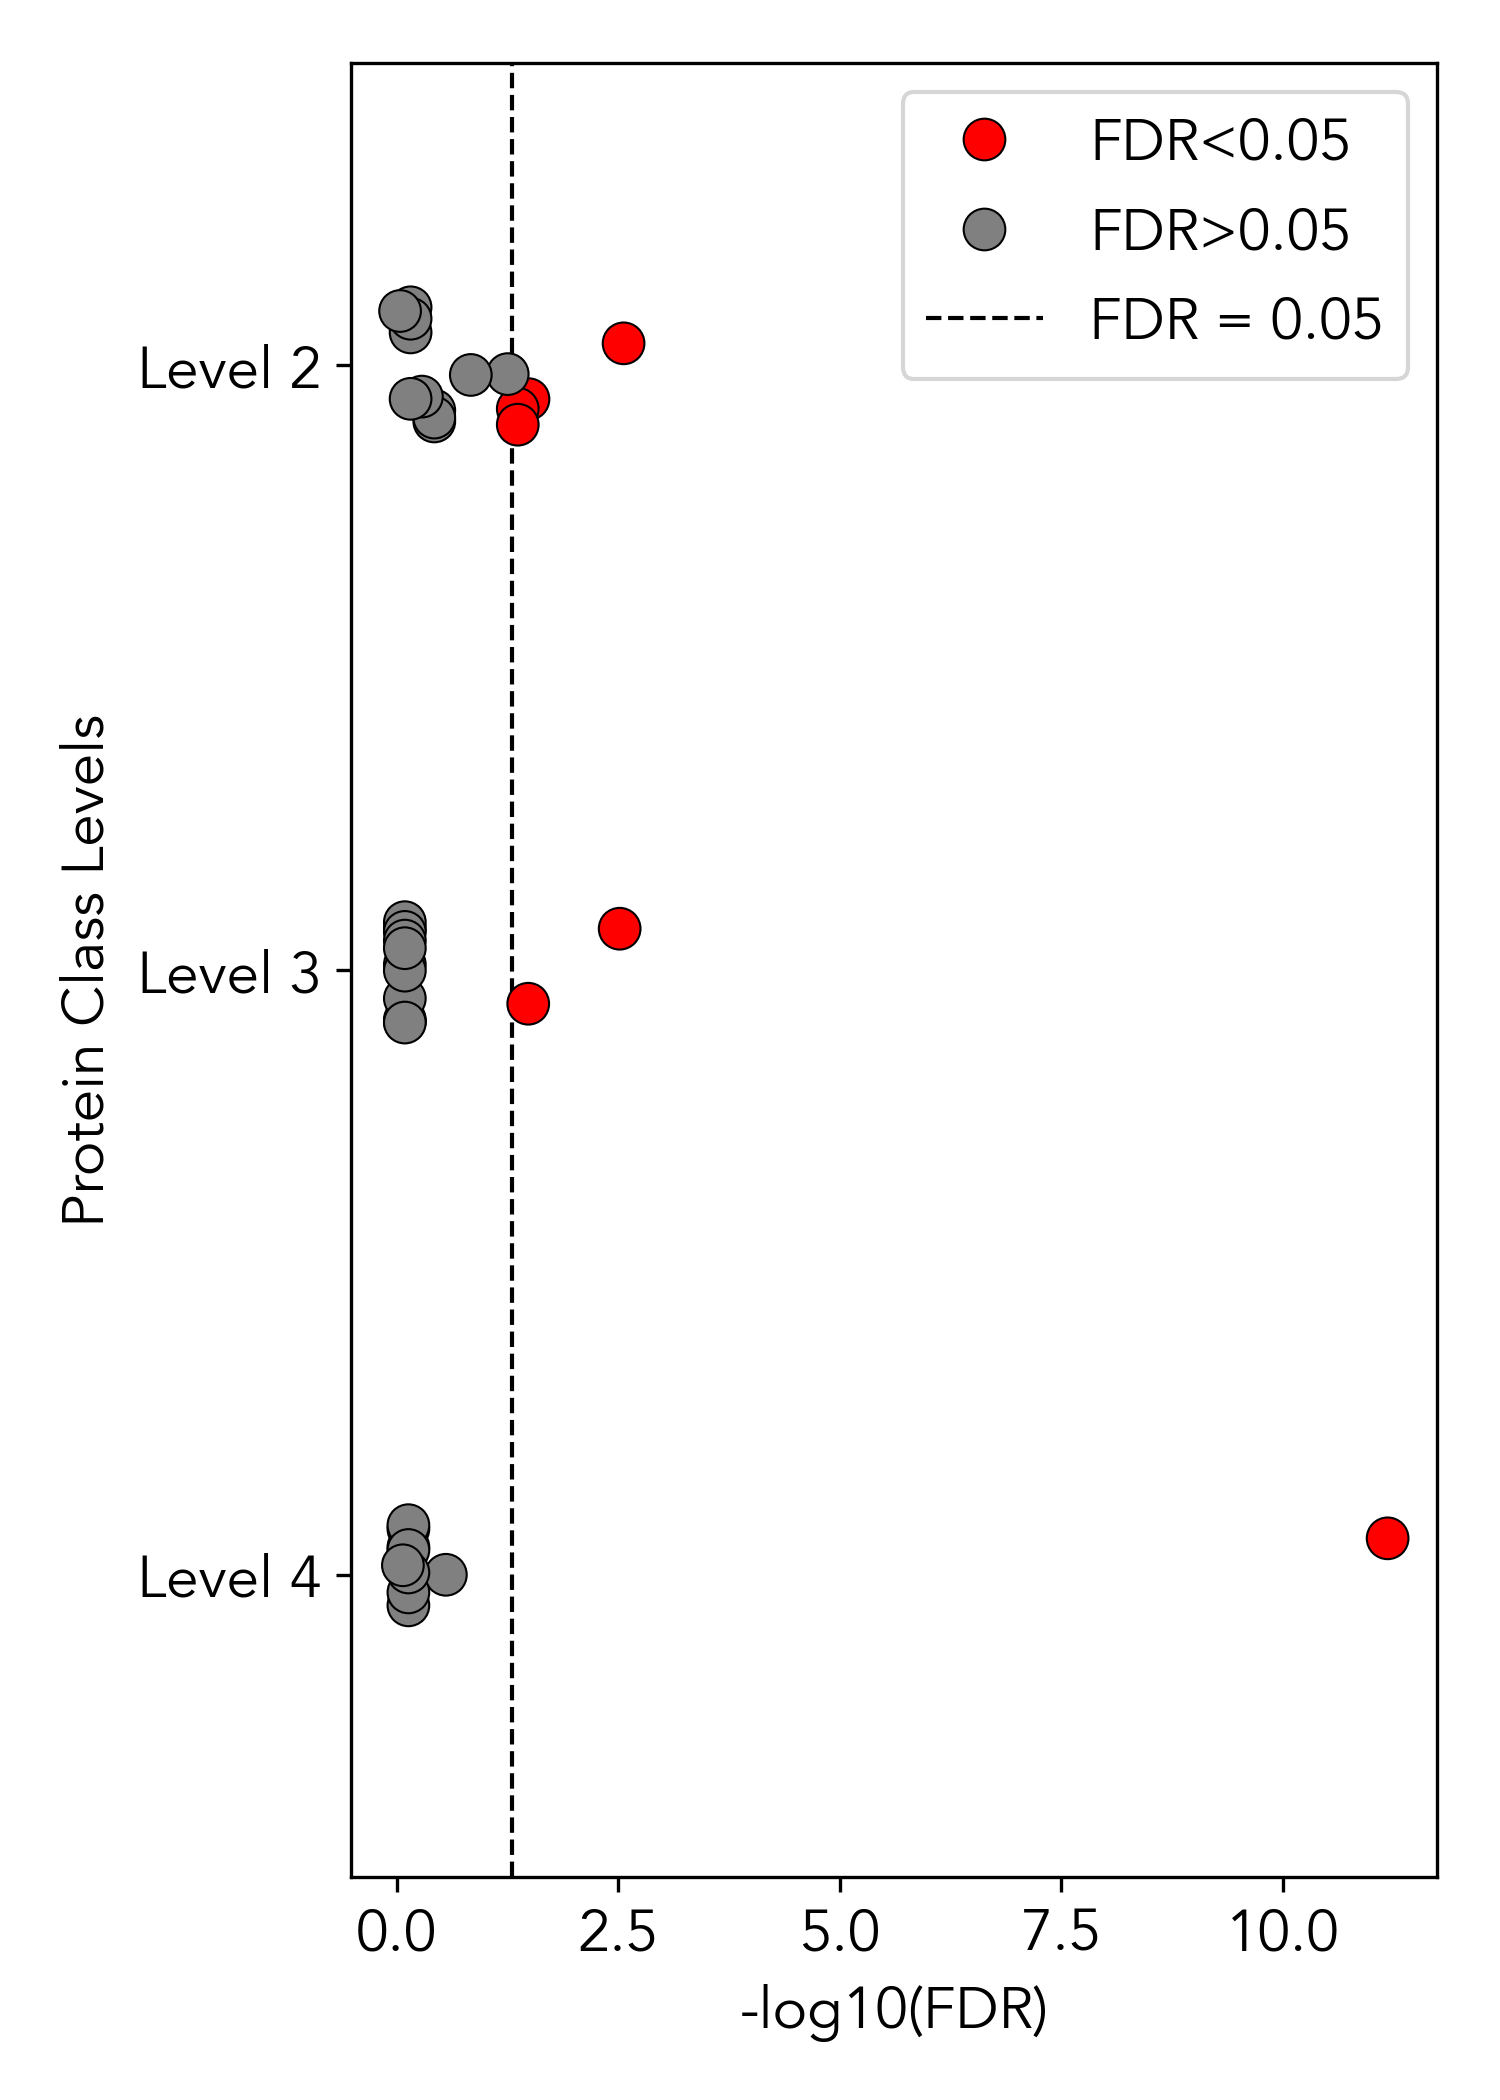

In [5]:
# Protein family enrichment
if __name__ == "__main__":
    enrichment_df, plot = Clinical.protein_family_enrichment(
        query = cauchy,
        custom_background = 'ensembl',
        level = ['level2', 'level3', 'level4'],
        random_iter = 100, # Low for example - Default = 5000
        cores = 2,
        savepath = savepath + 'ProteinFamilyEnrichment/'
    )
    print(enrichment_df.head(5))
    IPython.display.display(plot)

Valid cancer types: ['Breast']
0.07255458089576675


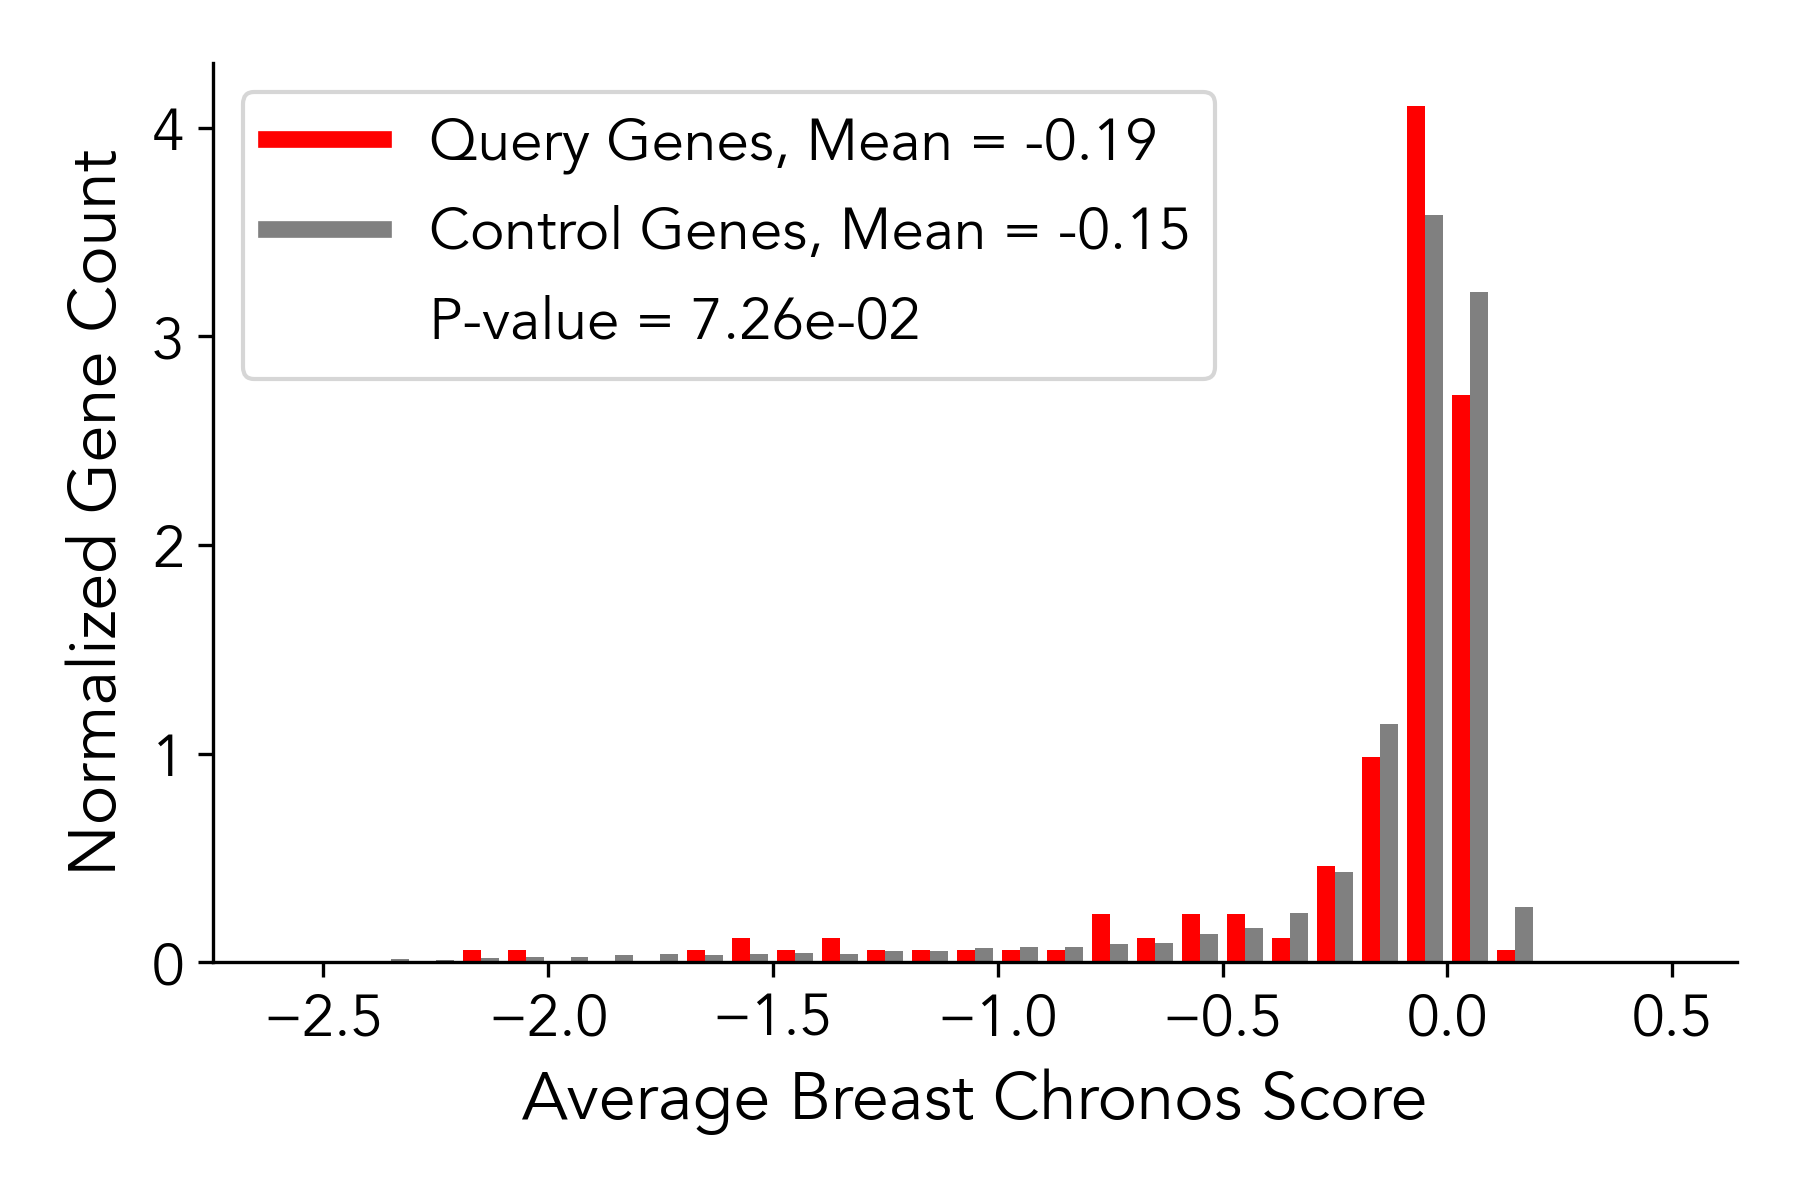

In [9]:
#depmap enrichment
p_val, plot = Clinical.depmap_enrichment(query = cauchy, cancer_type = ['Breast'])
print(p_val)
plot

In [11]:
# Drug_gene_interactions
drug_dict = Clinical.drug_gene_interactions(
    query = cauchy,
    drug_source = ['OpenTargets', 'DGIdb'],
    dgidb_min_citations = 1,
    approved = True,
    savepath = savepath
)
print(drug_dict.keys())

OpenTargets - 178/178 genes found in Ensembl mapping.
OpenTargets - 24/178 genes with interacting drugs. 104 unique drugs found with True approval
DGIdb - 45/178 genes with interacting drugs. 276 unique drugs found with True approval
dict_keys(['OpenTargets', 'DGIdb'])


# Association

In [8]:
# Load data
query = pd.read_csv("/Users/Kevin/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Type 2 Diabetes/Runs/v5_BigPipeline_Mu_PyCFS/AgeSexBMI_Match_23Train/IMSB_3ML_Resources/GeneLists/StatisticalCombo/StatComboLists_NoFill/Cauchy/v5_T2D_3Method_Cauchey_p<1.e-04.txt", header = None)
query = query[0].tolist()
example_query = ['PDGFRB', 'APOE', 'SLC30A8', 'KCNJ11', 'ACLY']

# Define path to VCF
path_to_vcf = "/Users/Kevin/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Genomics CFS Scripts/pyCFS Package/Individual Other Scripts/VariantsBySample/ukb23155_b0_v1.canon_anno.coding.ea_vep_dbNSFP4.2a_loftee_canon.v5_T2D.AC.AN_filtered.AF.HWE_filtered.SexAgeBMI_Match.cleaned.vcf.gz"
# Load samples
path_to_samples = "/Users/Kevin/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Type 2 Diabetes/Runs/v5_BigPipeline_Mu_PyCFS/AgeSexBMI_Match_23Train/IMSB_3ML_Resources/pyCFS/Cauchey_p1e-4/IntermediateFiles/CaseControl_SampleCase.txt"
samples = pd.read_csv(path_to_samples, sep = '\t', header = None, names = ['SampleID', 'CaseControl'], dtype = int)

# Load the training and testing samples for risk prediction
train_samples = pd.read_csv("/Users/Kevin/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Type 2 Diabetes/Patient Sampling/v5 Cohort/Cohort_Post-RandomSample/AgeSexBMI_Match_TrainTest_23-13/v5_T2D_Cohort_23TRAIN_SexAgeBMIMatch_IDs_Case.csv", header = None, names = ['SampleID', 'CaseControl'], dtype = int)
test_samples = pd.read_csv("/Users/Kevin/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Type 2 Diabetes/Patient Sampling/v5 Cohort/Cohort_Post-RandomSample/AgeSexBMI_Match_TrainTest_23-13/v5_T2D_Cohort_13TEST_SexAgeBMIMatch_IDs_Case.csv", header = None, names = ['SampleID', 'CaseControl'], dtype = int)

# Load the whole pEA matrix
whole_pea = pd.read_csv("/Users/Kevin/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Type 2 Diabetes/Runs/v5_BigPipeline_Mu_PyCFS/AgeSexBMI_Match_23Train/IMSB_3ML_Resources/pyCFS/Cauchey_p1e-4/IntermediateFiles/v5T2D_WholeCohort_AgeSexBMI-Match_Cauchy-178_Gene-pEA_AF1-0.csv", index_col = 0)

# Define the save path
savepath = "/Users/Kevin/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Genomics CFS Scripts/pyCFS Package/pyCFS_project/Examples/"

In [4]:
# variants_by_sample
if __name__ == "__main__":
    variants_by_sample = Association.variants_by_sample(
        query = example_query,
        vcf_path = path_to_vcf,
        samples = samples,
        cores = 4,
        savepath = savepath
    )
variants_by_sample.head(3)

100%|██████████| 5/5 [00:00<00:00, 1304.52it/s]


ENSP chr       pos ref  ... zyg        AF AN_Cohort  CaseControl
0  ENSP00000345708  11  17386938   G  ...   1  0.002195      6546            1
1  ENSP00000345708  11  17386938   G  ...   1  0.002195      6546            1
2  ENSP00000345708  11  17386938   G  ...   1  0.002195      6546            1

[3 rows x 14 columns]

  2%|▏         | 4/178 [00:20<00:15, 11.14it/s]

---------------Exact test format df---------------
  chr       pos ref  ... Control_Heterozygote_AC Case_AN Control_AN
0  19  44908822   C  ...                     541    6546       6546
1  19  44908684   T  ...                     909    6546       6546
2  17  41909521   T  ...                     675    6546       6546

[3 rows x 18 columns]
------------------Odds ratio df-------------------
        genomic_object     gene  ...               ENSP      variant
0  SLC30A8:p.Arg325Trp  SLC30A8  ...  ENSP00000415011.2  p.Arg325Trp
1   KCNJ11:p.Val337Ile   KCNJ11  ...  ENSP00000345708.4  p.Val337Ile
2    KCNJ11:p.Lys23Glu   KCNJ11  ...  ENSP00000345708.4   p.Lys23Glu

[3 rows x 15 columns]
-----------------Odds ratio plot------------------


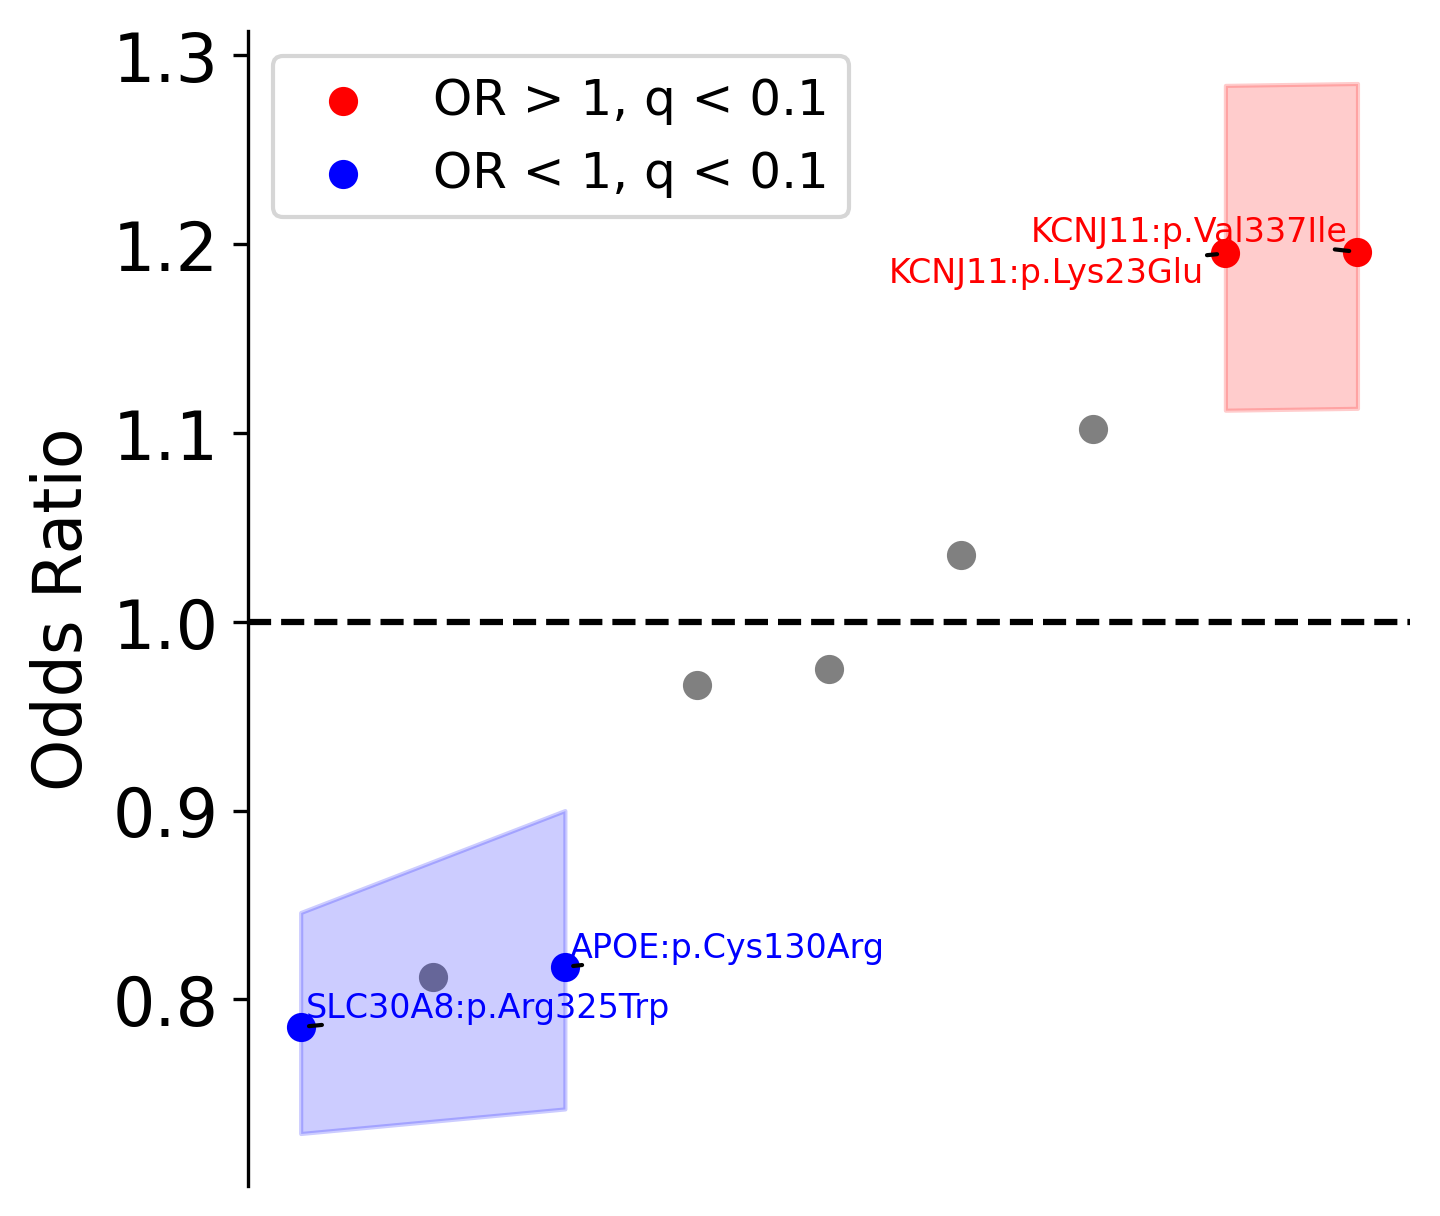

In [6]:
#  odds_ratios
if __name__ == '__main__':
    exact_test_format_df, or_df, or_plot = Association.odds_ratios(
        query = example_query,
        samples = samples,
        variants_by_sample = variants_by_sample,
        level = 'variant', 
        model = 'dominant',
        consequence = 'missense_variant|frameshift_variant|stop_gained|stop_lost|start_lost',
        ea_lower = 0,
        ea_upper = 100,
        min_af = 0.01,
        max_af = 1,
        cores = 6,
        show_plot_labels = True,
        savepath = savepath
    )
print("Exact test format df".center(50, '-'))
print(exact_test_format_df.head(3))
print("Odds ratio df".center(50, '-'))
print(or_df.head(3))
print("Odds ratio plot".center(50, '-'))
or_plot

---------------Sample probabilities---------------
           Control      Case  True_Class
SampleID                                
1010655   0.392628  0.607372           1
1017652   0.686158  0.313842           1
1018400   0.380532  0.619468           1
----------------Risk distribution-----------------


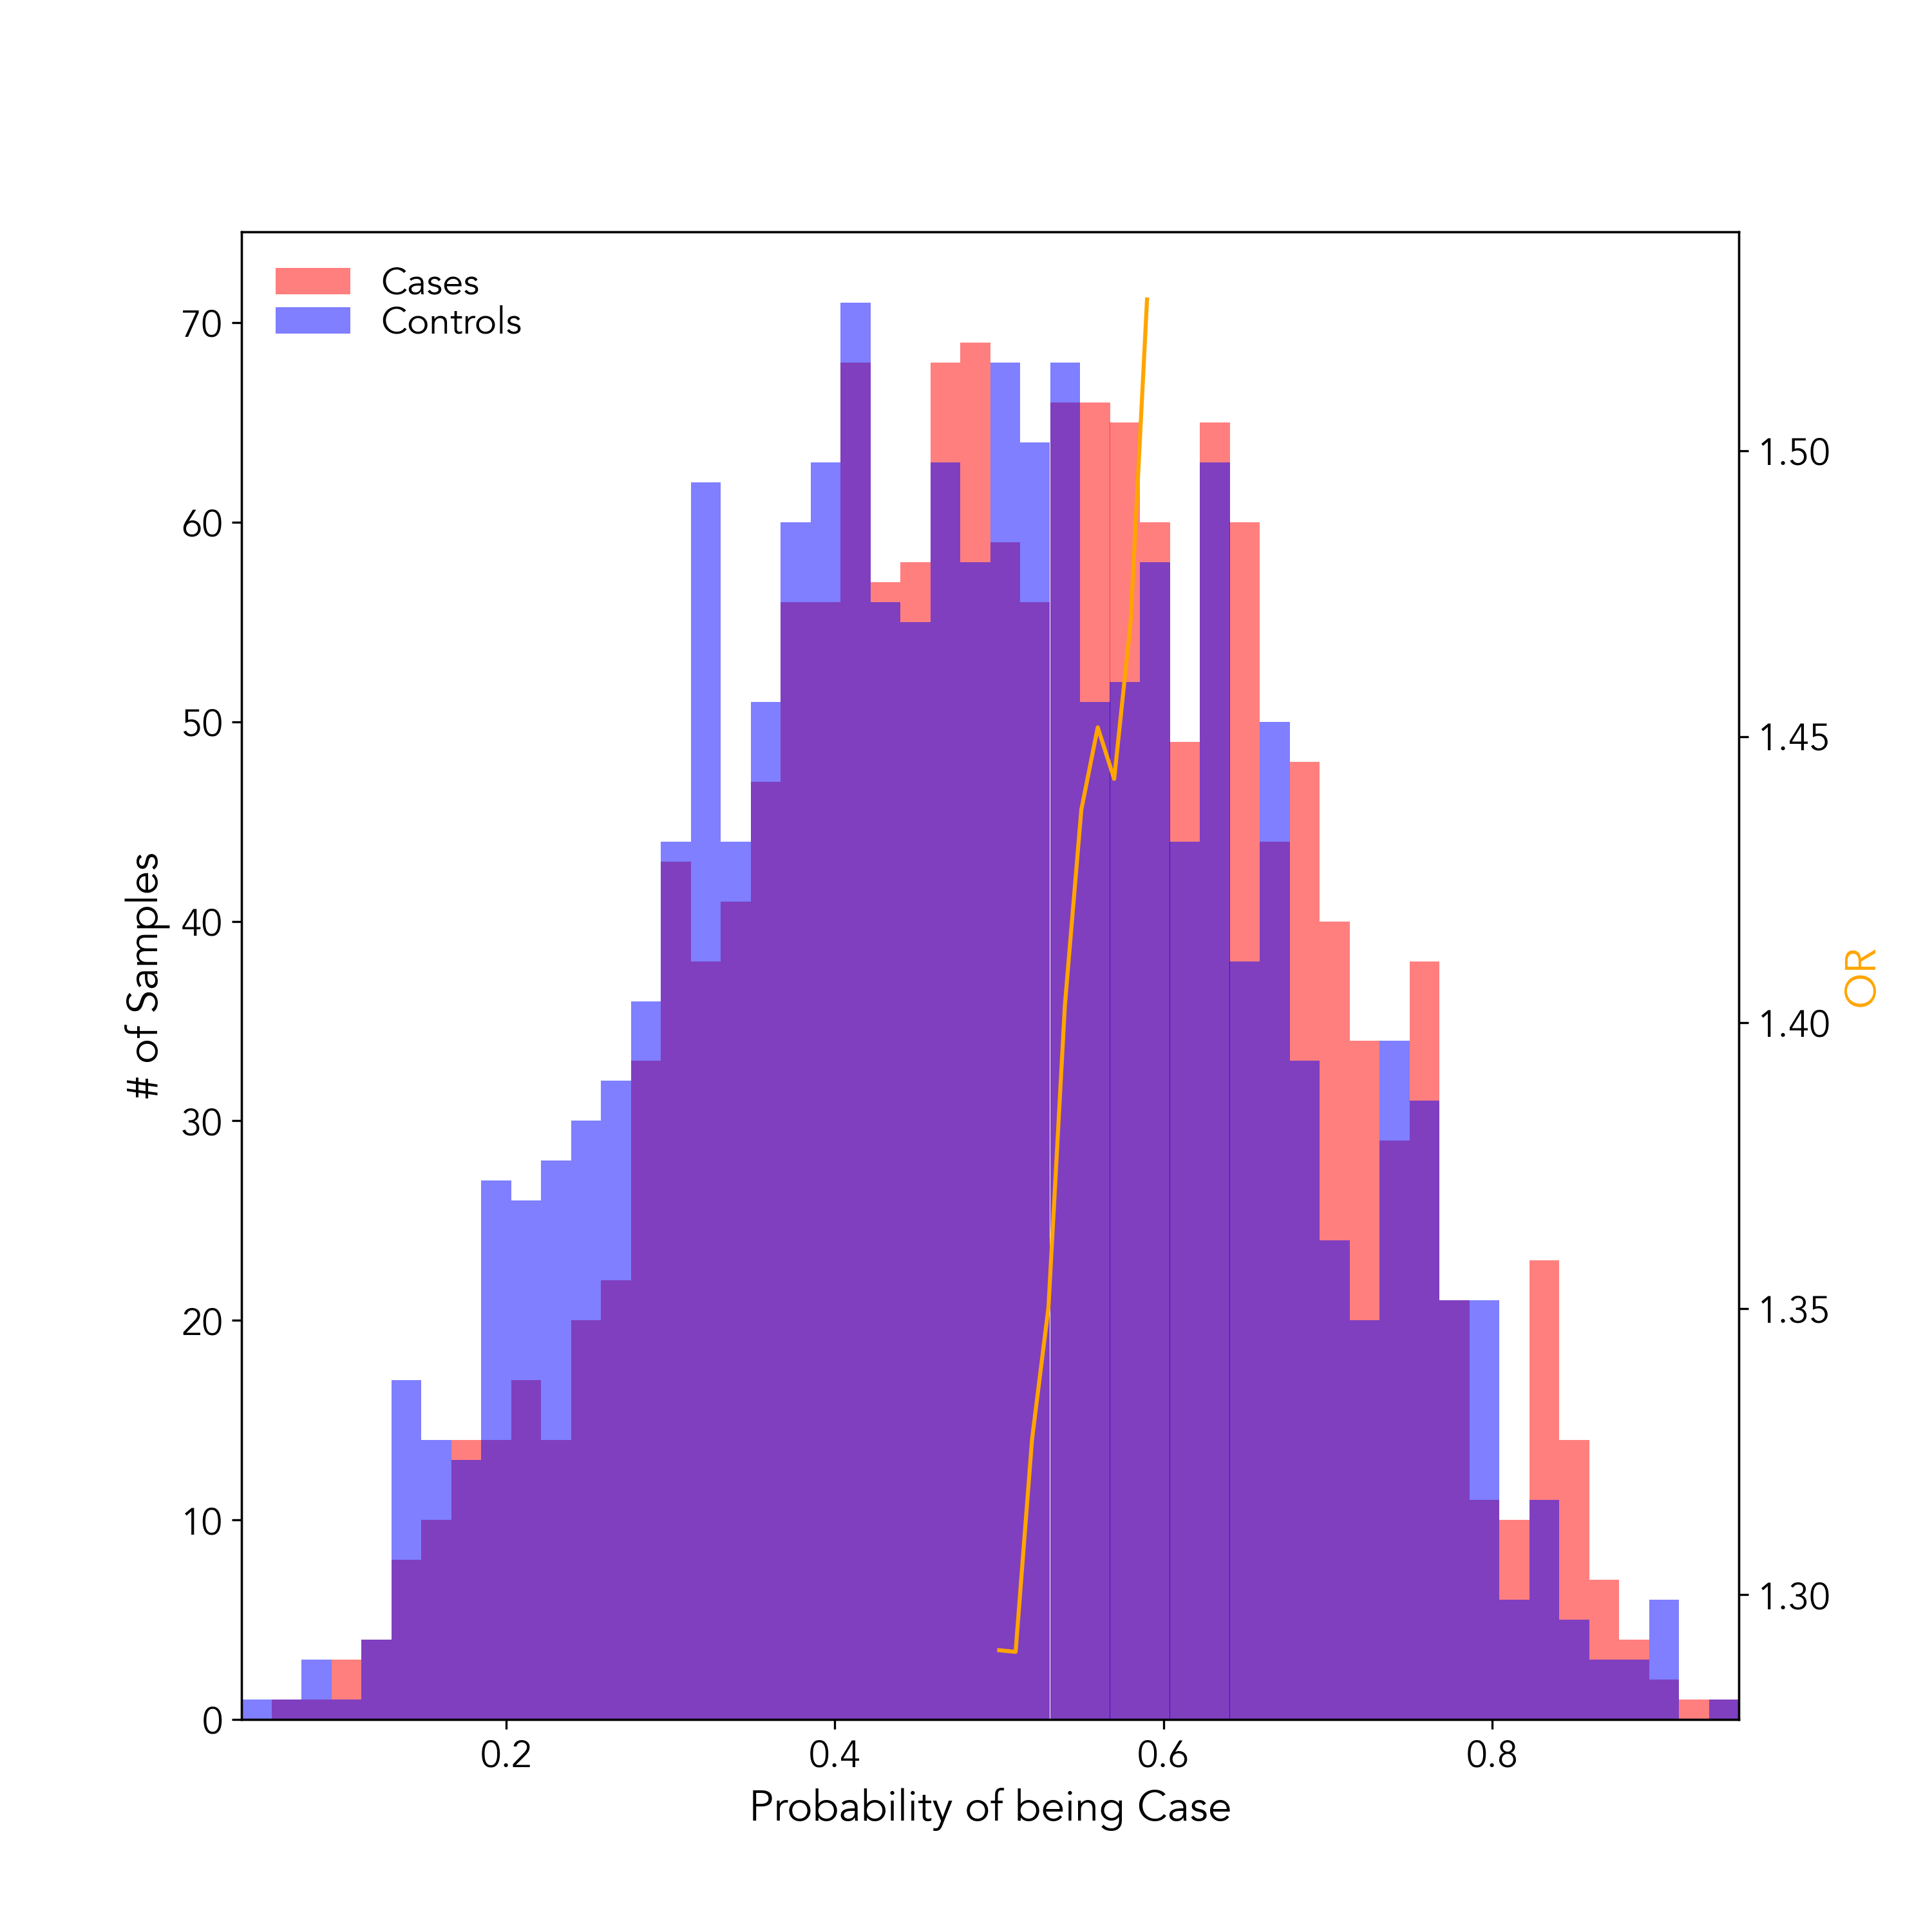

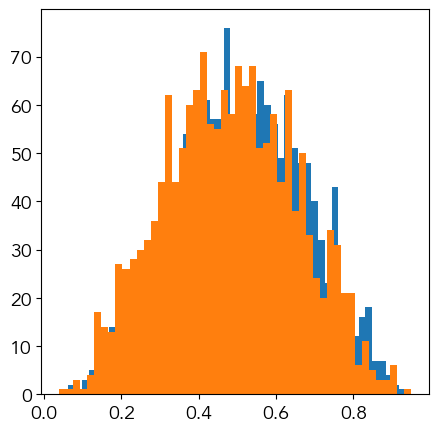

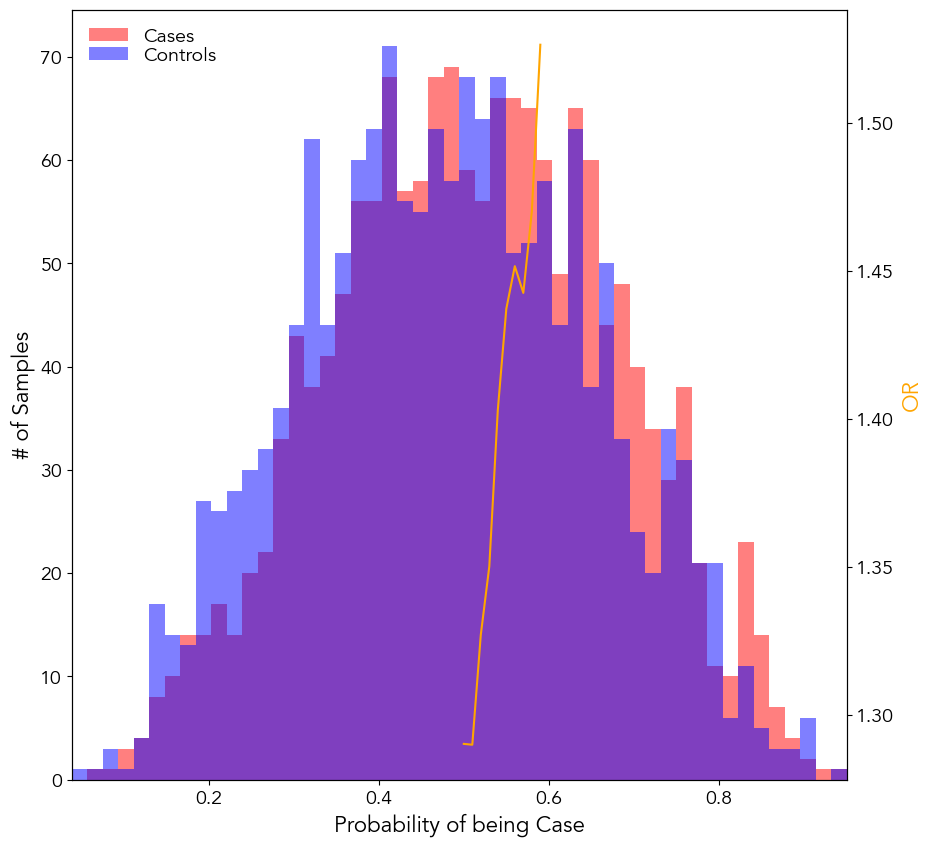

In [10]:
# risk prediction
if __name__ == '__main__':
    risk_distribution, eval_auroc, sample_proba, feature_weights = Association.risk_prediction(
        feature_matrix = whole_pea,
        train_samples = train_samples,
        test_samples = test_samples,
        models = "LR,wrong model",
        rfe = False,
        cores = 3,
        savepath = savepath
    )
print("Sample probabilities".center(50, '-'))
print(sample_proba.head(3))
print("Risk distribution".center(50, '-'))
risk_distribution

-------------EA distribution results--------------
      Gene      KS_p  FDR
0   PDGFRB  0.956345  1.0
1     APOE  0.362879  1.0
2  SLC30A8  1.000000  1.0
--------------EA distribution plots---------------


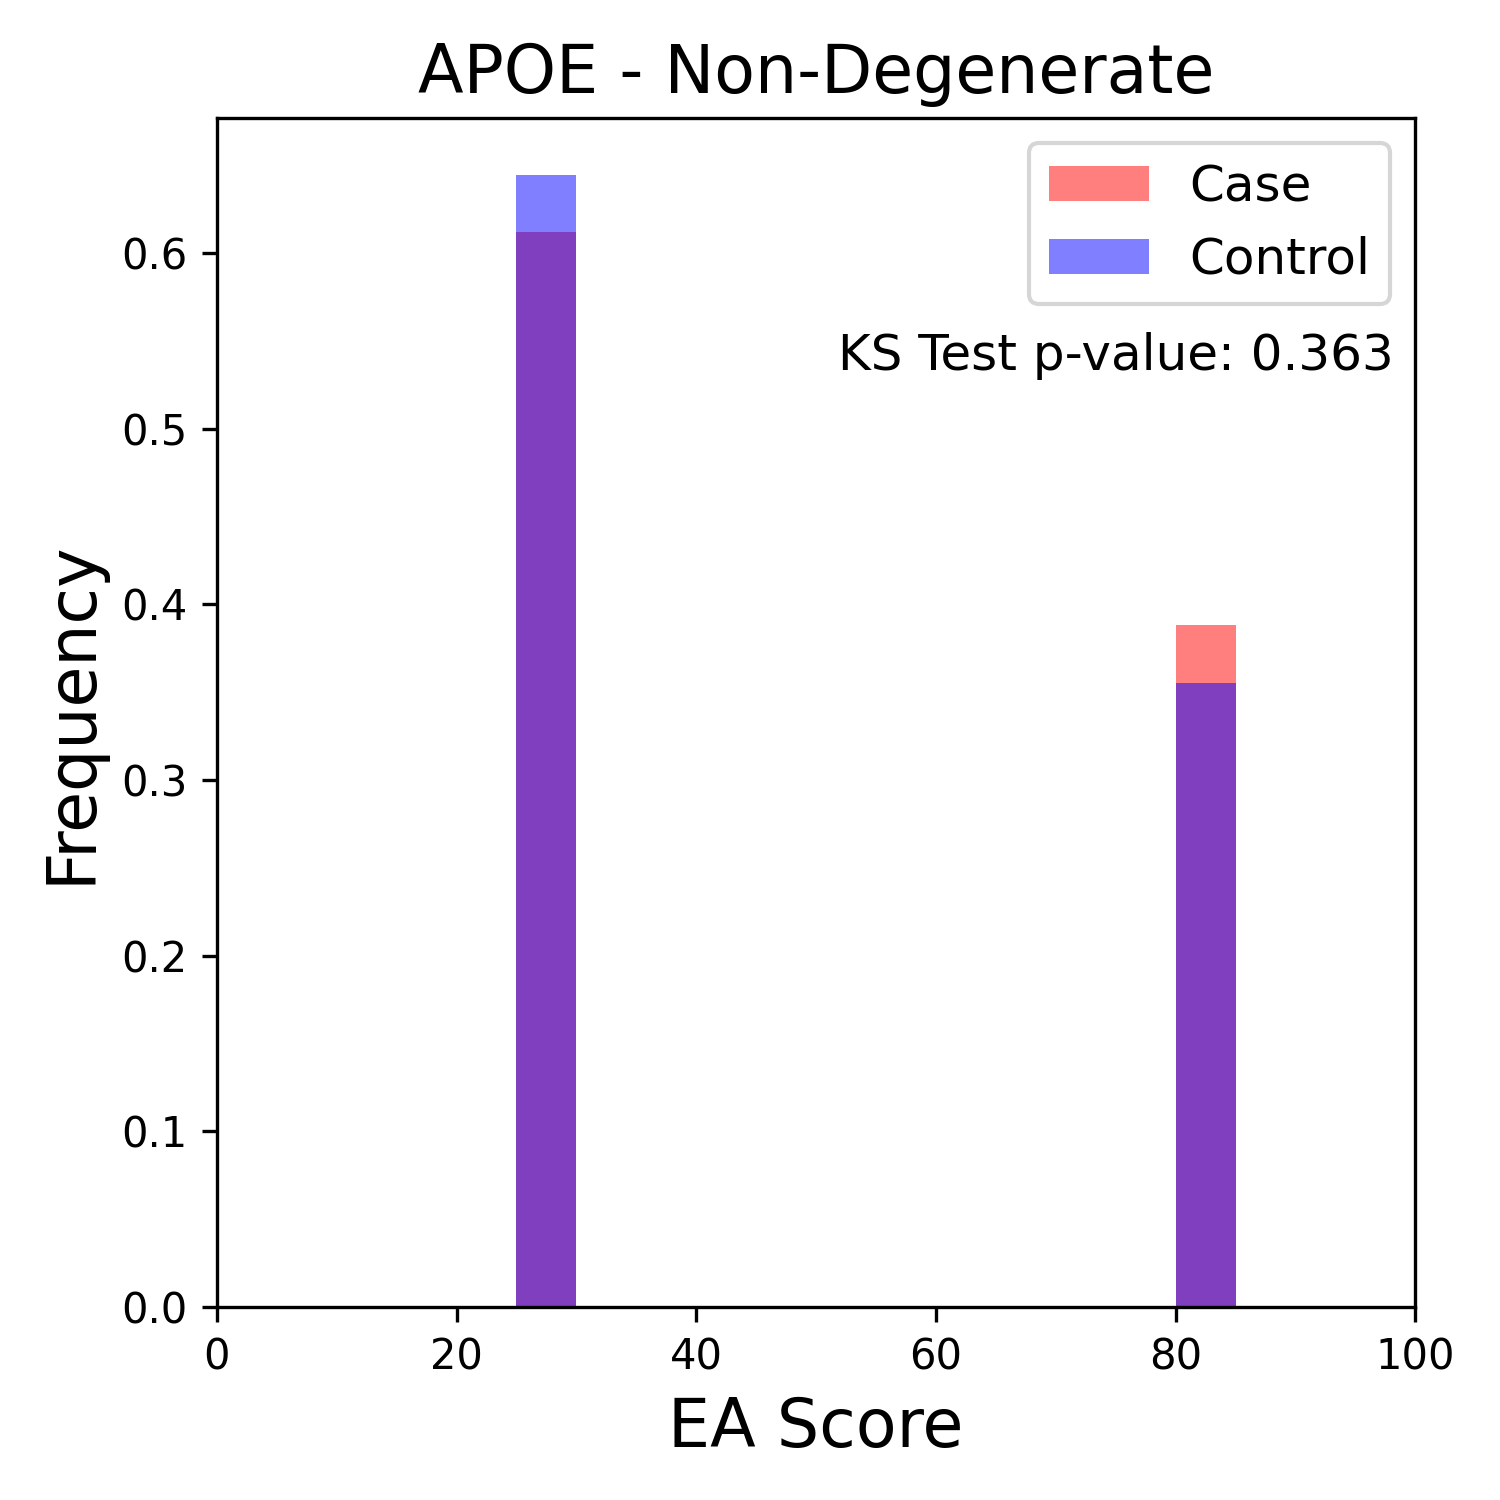

In [13]:
# ea_distributions
ea_dist_results, dist_plots = Association.ea_distributions(
    variants_or = exact_test_format_df,
    genes = example_query,
    min_vars = 1,
    distribution = 'non_degenerate',
    consequence = 'missense_variant|frameshift_variant|stop_gained|stop_lost|start_lost',
    min_af = 0.01,
    max_af = 0.5,
    savepath = savepath
)
print("EA distribution results".center(50, '-'))
print(ea_dist_results.head(3))
print("EA distribution plots".center(50, '-'))
dist_plots['APOE']

# Structure

Number of cases in variant file: 3273
Number of controls in variant file: 3273
P-value:  0.040154416937578846
Odds Ratio: 1.5098130841121495 (1.0186807595591665 - 2.2377329968838384)


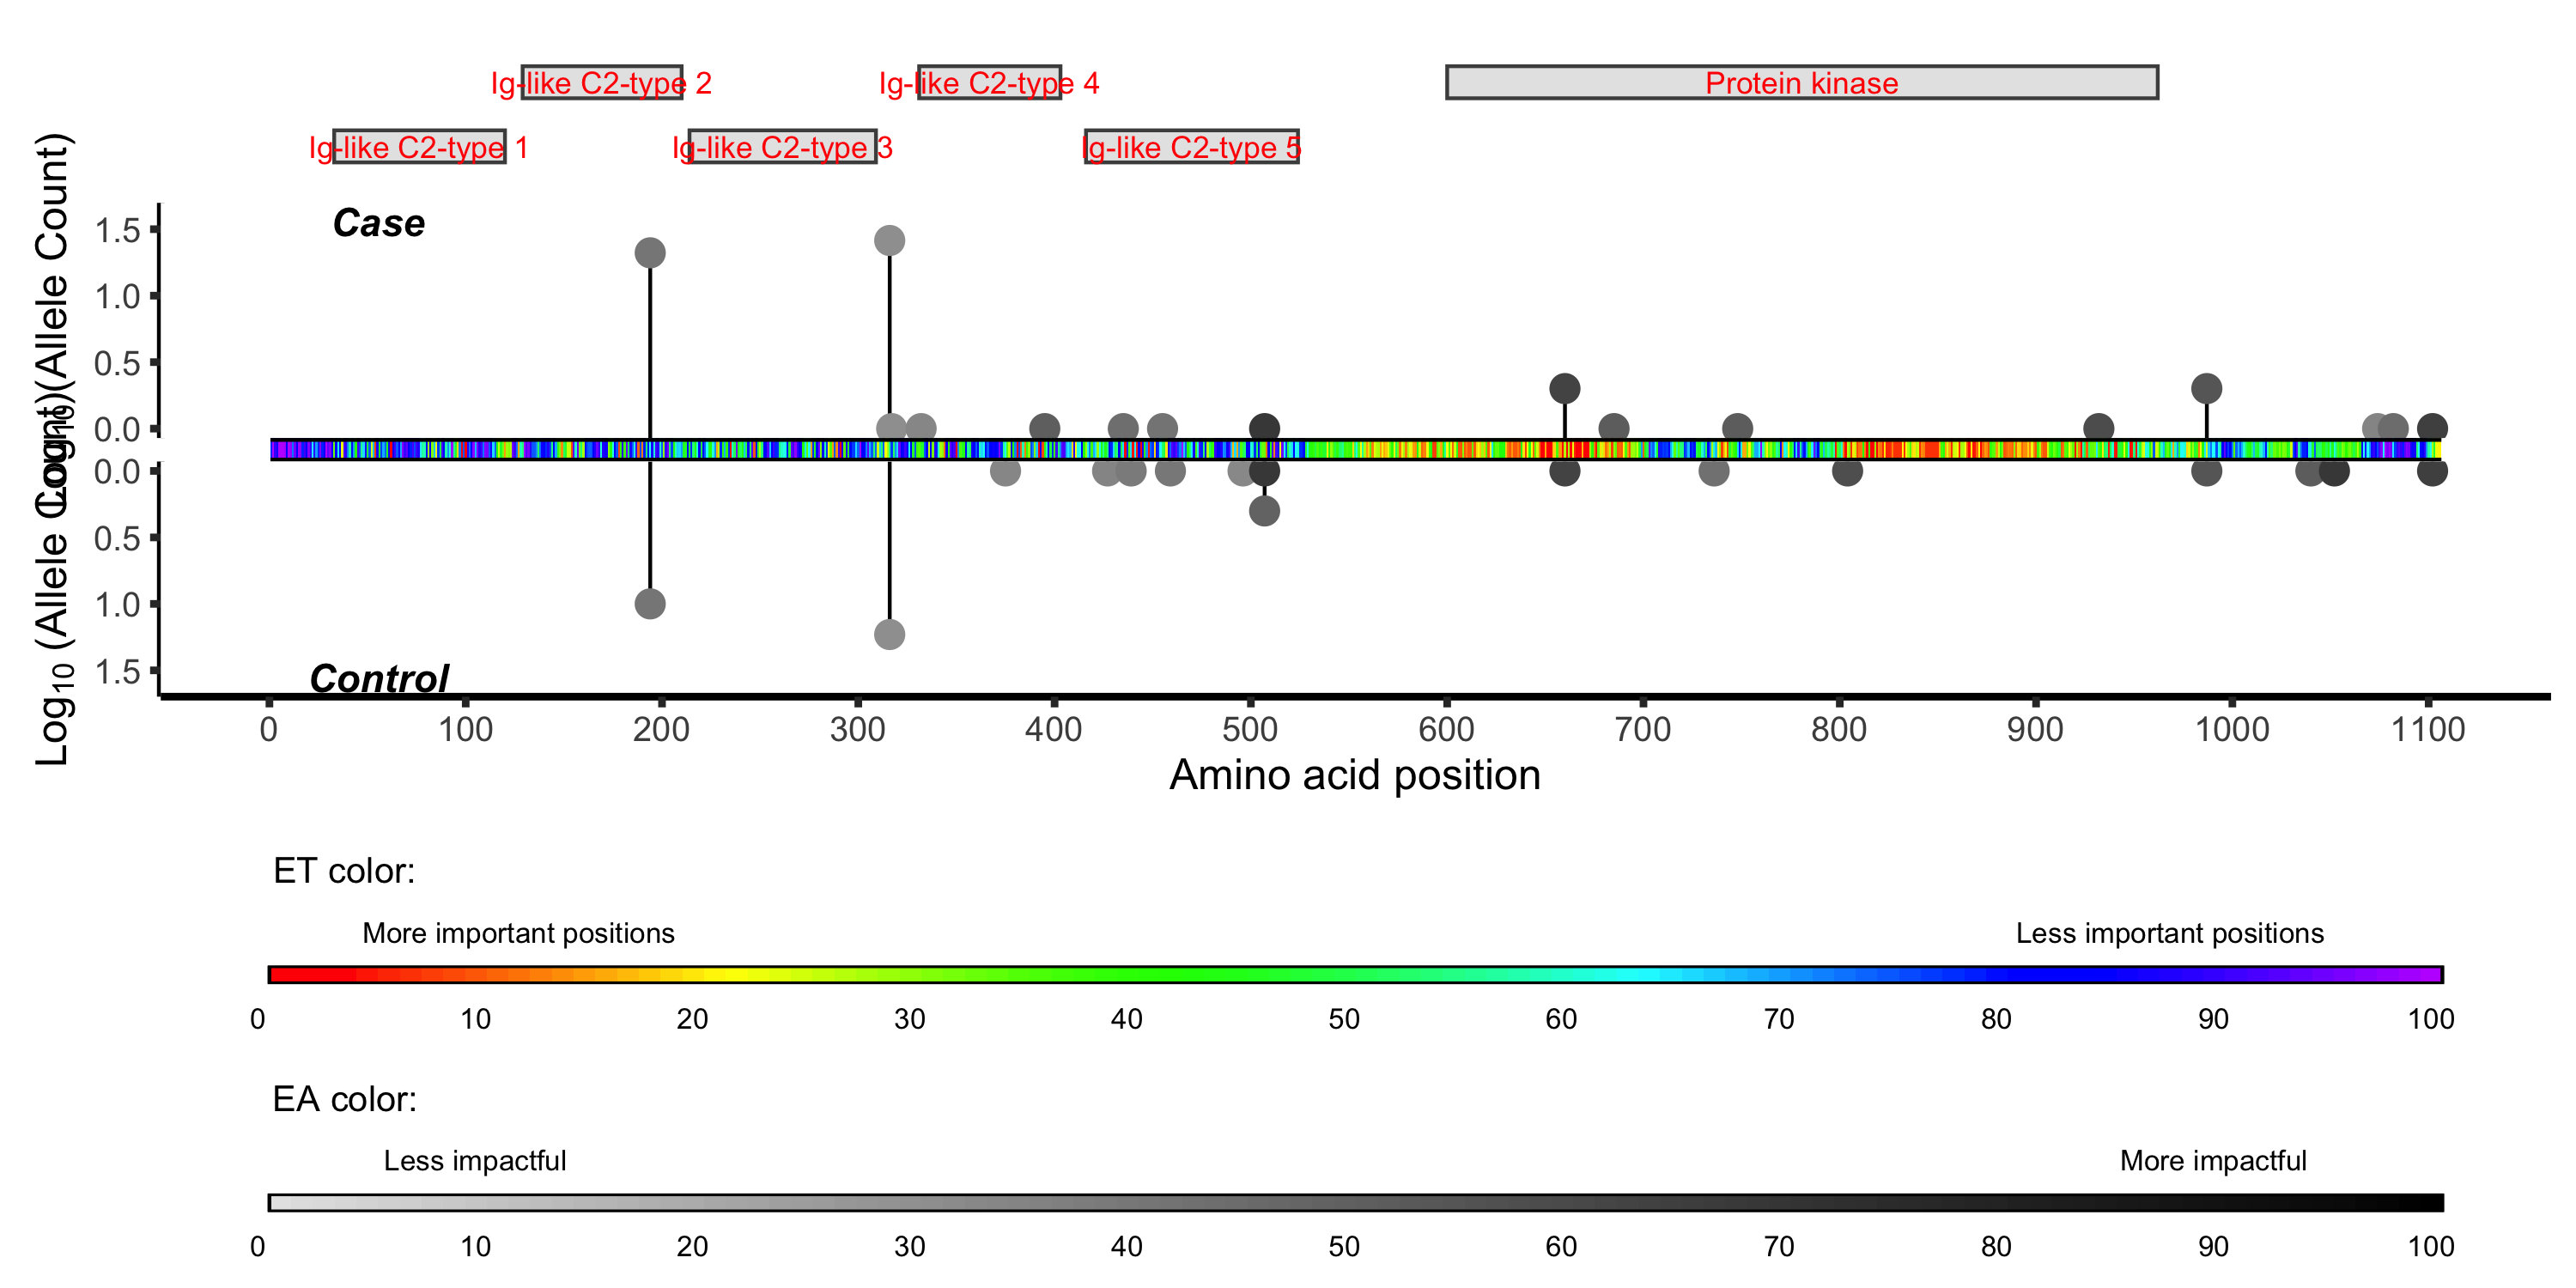

In [6]:
# Lollipop Plots --- This will take ~10 minutes to run the first time around as the R packages are installed and set up
os.environ['GITHUB_PAT'] =  "your_github_pat_here"
lollipop_image, pval, oddsratio, lower_ci, upper_ci = Structure.lollipop_plot(
    variants = variants_by_sample,
    gene = 'PDGFRB', 
    case_pop = 3273,
    cont_pop = 3273,
    max_af = 0.5,
    ea_lower = 30,
    ea_upper = 70,
    show_domains = True,
    ac_scale = 'log', 
    ea_color = 'gray_scale', 
    savepath = savepath
)
print("P-value: ", pval)
print(f"Odds Ratio: {oddsratio} ({lower_ci} - {upper_ci})")
lollipop_image

       bias    unbias  adj_dist  dist       type
1 -0.484201 -1.074038 -0.944892     6        all
1 -0.581652 -1.215164 -1.041225     7        all
1  1.836409 -0.730009 -0.969581     8        all
1  2.175843  0.256512 -0.785641     9        all
1  1.590779 -0.064066 -0.618944    10        all
1 -0.621664 -1.320765 -1.158928     6  plddt >50
1 -0.747040 -1.503010 -1.281132     7  plddt >50
1  1.293496 -1.191426 -1.276769     8  plddt >50
1  1.602293 -0.422772 -1.179941     9  plddt >50
1  1.098345 -0.748831 -1.094386    10  plddt >50


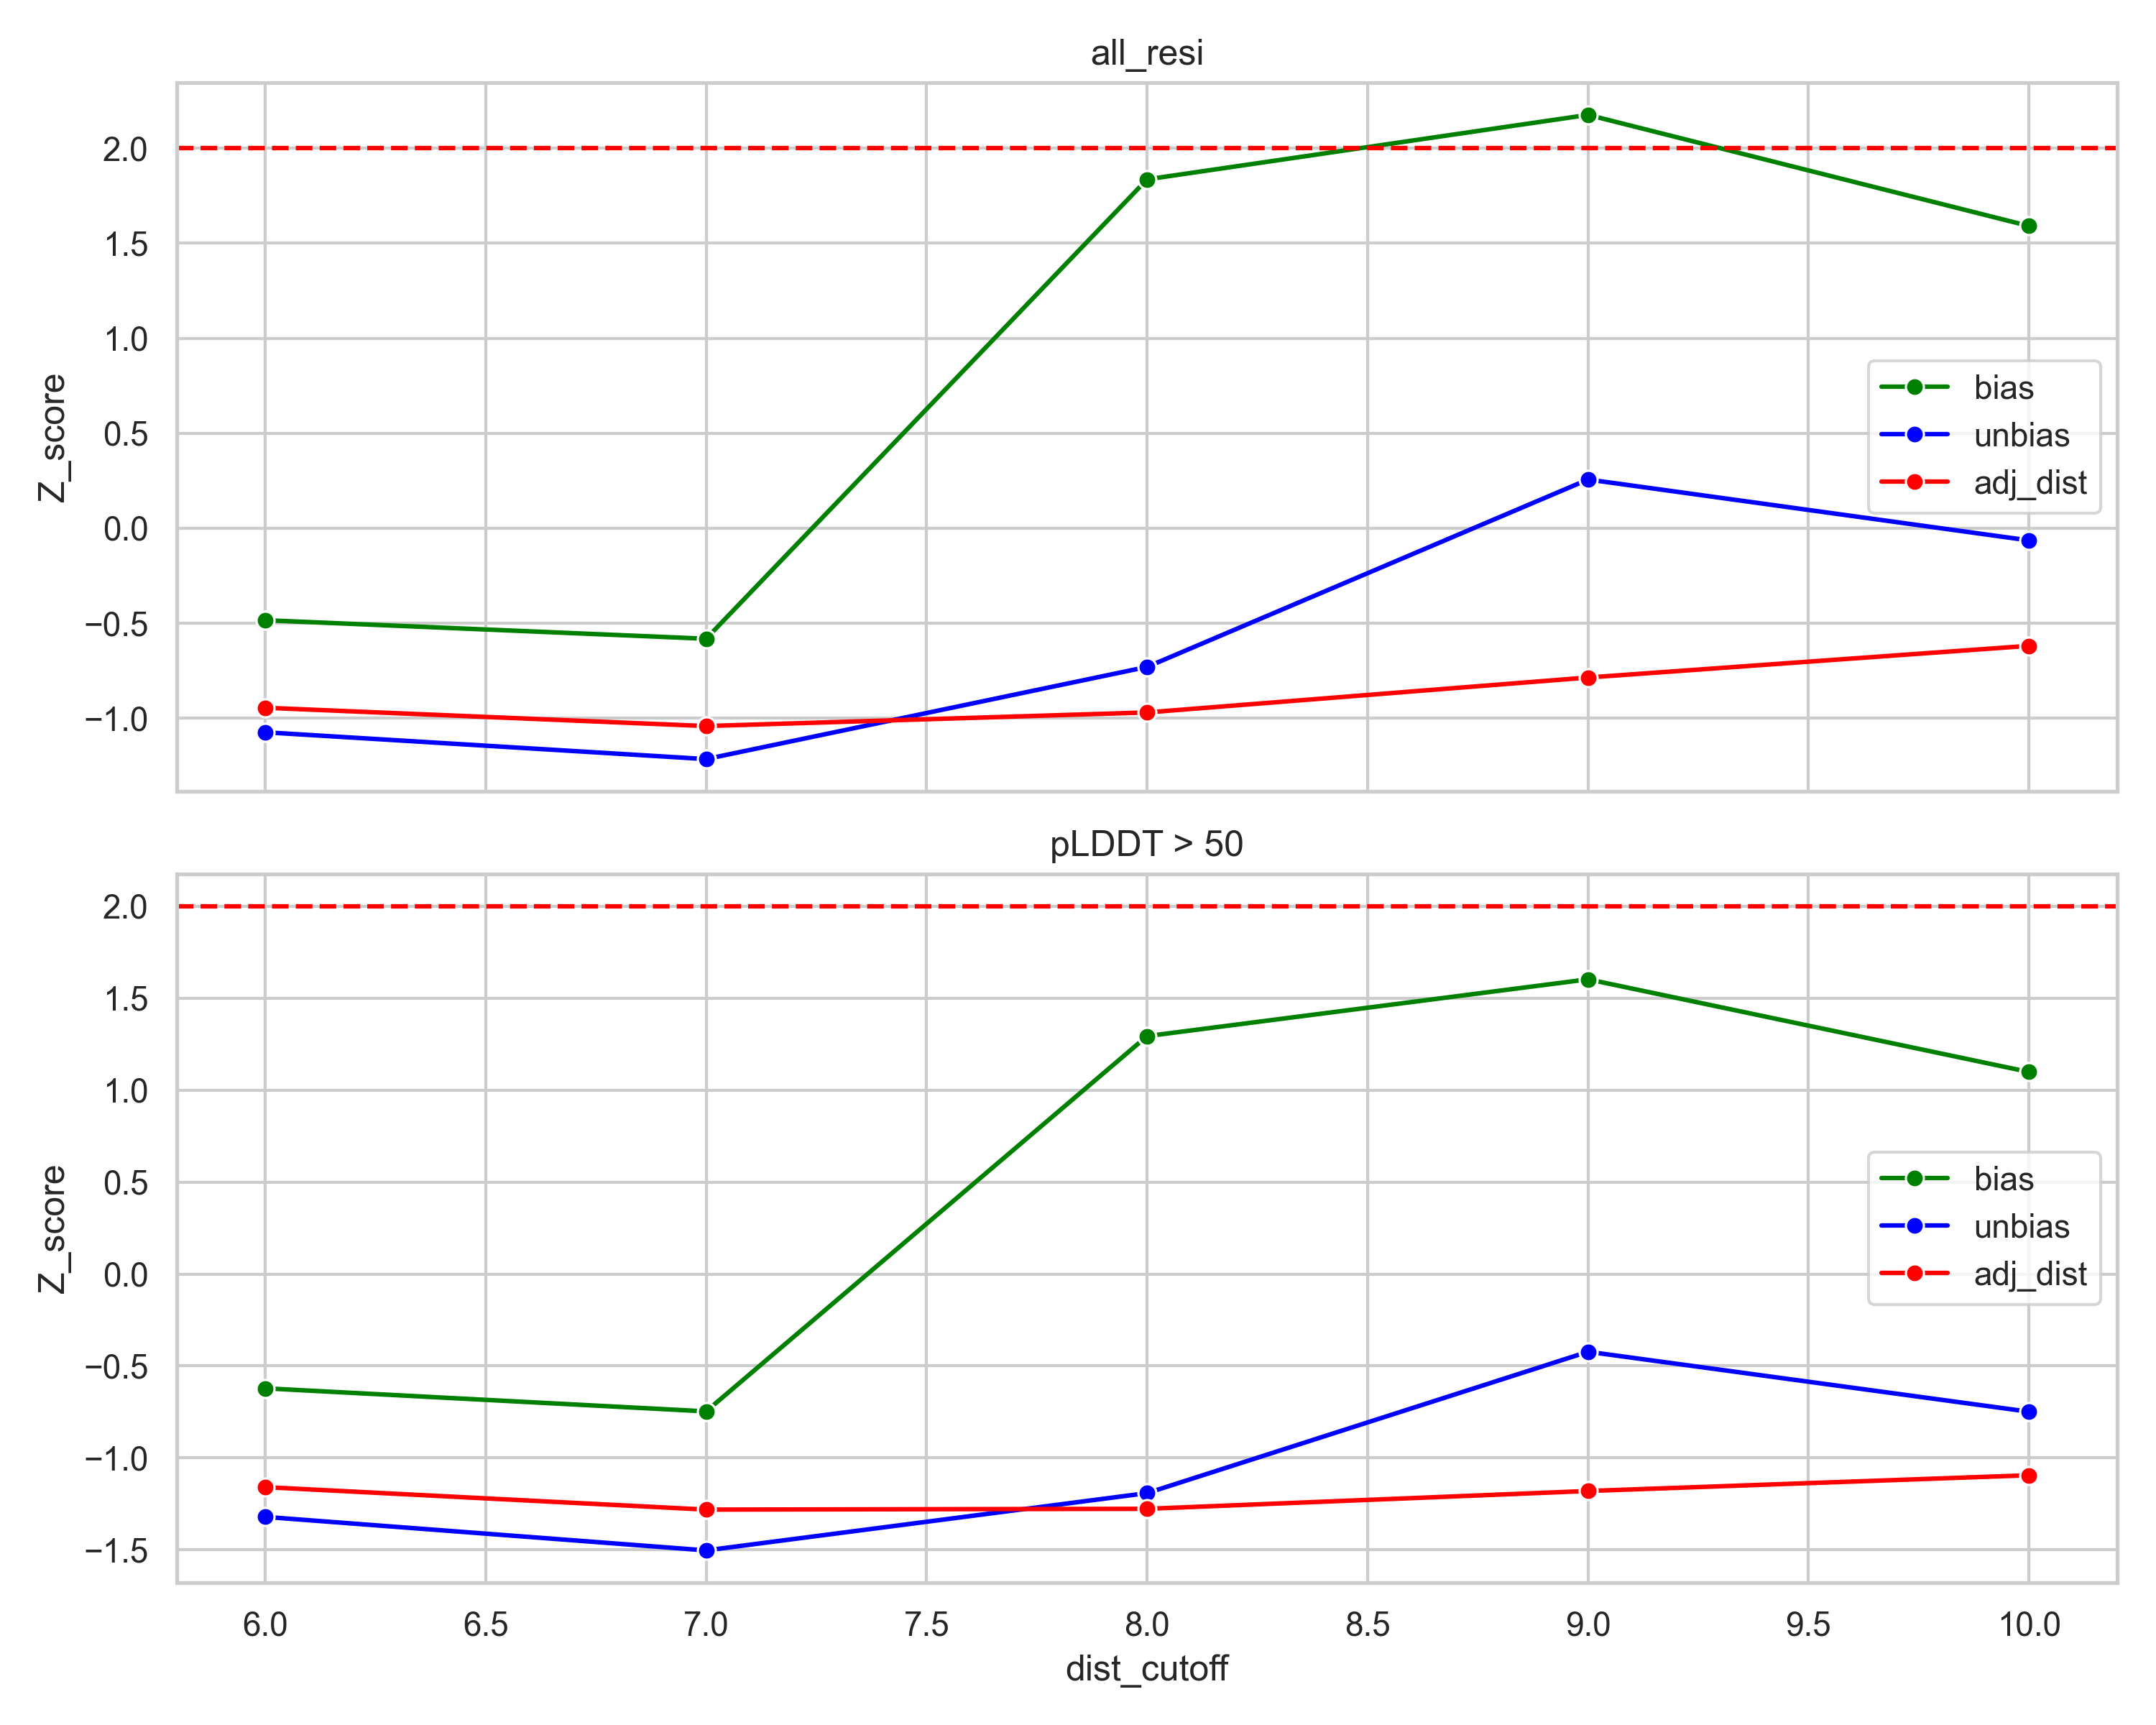

In [9]:
# protein_structures
if __name__ == "__main__":
    all_var_df, case_var_df, cont_var_df, all_var_plot, case_var_plot, cont_var_plot = Structure.protein_structures(
        variants = variants_by_sample,
        gene = 'PDGFRB',
        ea_lower = 50,
        scw_plddt_cutoff = 50,
        scw_min_dist_cutoff = 6,
        scw_max_dist_cutoff = 10,
        cores = 2, 
        savepath = savepath)
print(all_var_df)
all_var_plot

## Summarize

In [22]:
prioritization_df = Summarize.prioritize_genes(
    query = example_query,
    result_path = savepath,
    result_experiments = ['goldstandard_overlap', 'interconnectivity', 'gwas_catalog_colocalization'],
    score_method = 'rank',
    show_indiv_scores = True,
    savepath = savepath
)
print(prioritization_df.head(3))

         Score Gold Standard  ...  Interconnections Score-Interconnections
KCNJ11     2.0           1.0  ...                                      0.0
SLC30A8    1.8           1.0  ...                                      0.0
APOE       0.6            []  ...                                      0.0

[3 rows x 7 columns]
